# Problem Statement


Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

In [1]:
# importing required initial libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [2]:
# import data and check 6 different samples

data = pd.read_csv('hr-analytics.csv')
data.tail()



,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [3]:
# Checking the dimensions of the dataset
print('No. of Rows :',data.shape[0])
print('No. of Columns :', data.shape[1])
pd.set_option('display.max_columns',None) # This will enable us to see truncated columns
data.head()

No. of Rows : 1470
No. of Columns : 35


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
# Observations:

# This Dataset has 1470 rows and 35 columns. Let's study the column's names and their charectaristics.

In [5]:
# checking columns names

data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
# About the columns-

# 1.Age-This column shows the details about the age of the employer.

# 2.Attirition-This column shows the details about employee attrition

# 3.Business Travel-This column shows the details about the employees business travel with company.

#4.Daily Rate-This column shows the details about employers daily rate.

# 5.Department-This column shows the details about the employers department in which he works.

# 6.Distance from Home-This column shows the details about the employees distance from home to work place

# 7.Education-This column shows the details about the education level of the employee,

# 8.Education field-This column shows the details about the employees education field.

# 9.Employee Count-This column shows the details about the count of the employees count

# 10.Employee Number-This column shows the details about employee number

# 11.Environment Satisfaction-This column shows the details about the employees environment satisfaction.

# 12.Gender-This column shows the details about the employees gender.

# 13.Hourly Rate-This column shows the details about the employees hourly rate

# 14.Job Environment-This column shows the details about employees job environment

# 15.Job Level-This column shows the details about the employees job level

# 16.Job Role-This column shows the details about the employees job role in the company.

# 17.Job Satisfaction-This column shows the details about the employees job satisfaction

# 18.Marital Status-This column shows the details about the employees martial status.

# 19.Num Companies Worked-This column shows the details about the employees past no. of companies he had worked for.

# 20.Over 18-This column shows the details about the employees working over 18 hours 

# 21.Over Time-This column shows the details about the employees working over time

# 22.Percent Salary Hike-This column shows the details about the employees salary hike percent in the company

# 23.Performance Rating-This column shows the details about the employees performance rating in the company

# 24.Relationship Satisfaction-This column shows the details about companies satisfaction

# 25.Standard Hours-This column shows the details about the employees standard hours in the company

# 26.Stock Option Level-This column shows the details about companies stock option level.

# 27.Total Working Years-This column shows the details about the total working year of the employee in the company

# 28.Training time Last Year-This column shows the details about the employees training time last year

# 29.Work Life Year-This column shows the details about the emplyees work life year in the company

# 30.Years at company-This column shows the details about the employees total years of working in the company.

# 31.Years in curent role-This column shows the details abot the employees total year of working in the company.

# 32.Years Since Last Promotion-This column shows the details about the employees last promotion

# 33.Years with Curr manager- details about the employees time spent working with a manager

# 34.Monthly Income-This column shows the deatails about the employee monthly income.

# 35.Monthly Rate-This column shows the details about monthly rate.


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
# Observations:

# 26 of the features are numarical datatypes and 9 are object datatypes.

# Among all Numeric Variables 'Education','EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'RelationshipSatisfaction', 
#'PerformanceRating', 'WorkLifeBalance' are ordinal variable.


# Target variable is 'Attrition' and it is a object datatype. So it is a Classification problem.

# Data Integrity Check

In [9]:
# Checking for the presense of any whitespaces, '?', 'NA', '-' in the dataset

In [10]:
data.isin(['NA','N/A','-',' ','?',' ?']).sum().any()

False

In [11]:
# Observations:

# No White spaces, 'NA', 'N/A', '-', '?', ' ?' present in the dataframe

# Duplicate Values Check

In [12]:
data.duplicated().sum()

0

In [13]:
duplicate = data[data.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [14]:
# Observations:

# No duplicate values present in the dataframe

# Null Values Handling

In [16]:
# Checking the sum of null values for all columns
    
data.isnull().sum().sum()

0

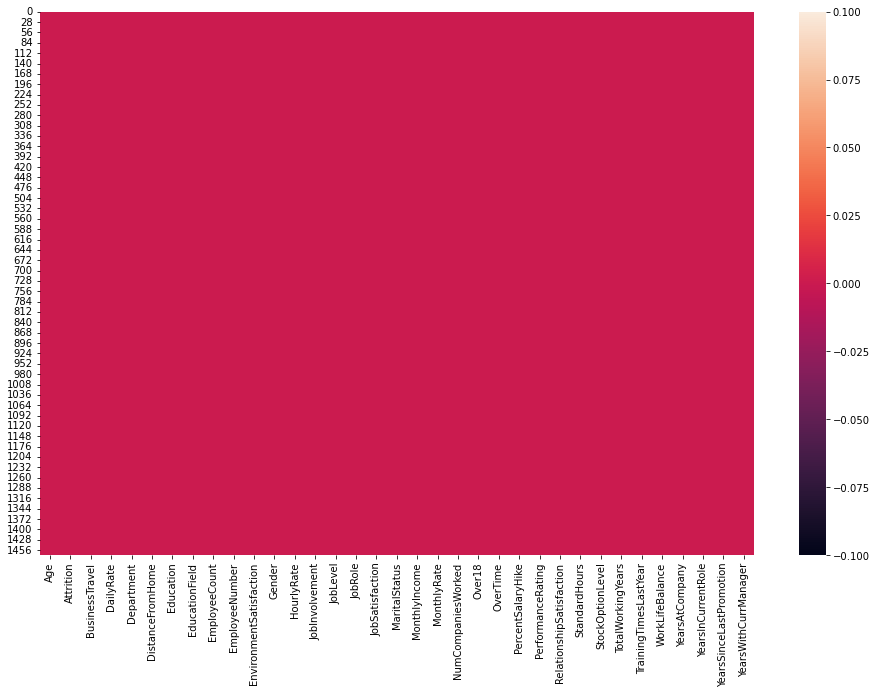

In [17]:
sns.set_palette('coolwarm_r')
plt.figure(figsize = (16,10))
sns.heatmap(data.isnull())
plt.show()

In [18]:
# Observations:

# No null values are present in the total dataset.

# Checking different statistical parameter:


In [19]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [20]:
data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [21]:
# Observations:

# 1) Min age is 18 and max is 60.

# 2) min, max and all percentile is 80 for StandardHours and std is 0. Seems it is fixed value for all.

# 3) On PerformanceRating of employees, 
#min value is 3 and max is 4 and mean is 3.163. Seems, performance of most of employee is 'Good'.

# 4) For ordinal features -mean, median, std does not making any sense

# 5) Outliers are present in the overall dataset.

# 6) 50% of Employees has worked atleast 2 companies previously.

# 7)Monthly Income,monthly rate are right skewed because mean values is greater than the median values.

# StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager have the minimum values is zero
#which shows that some new joining/Recent joining are also present in our Dataset.

# Exploration of Categorical data:-

In [22]:
# Checking different unique values for categorical features

# 1.Attrition(Target variable):

In [23]:
data["Attrition"]. unique()

array(['Yes', 'No'], dtype=object)

In [24]:
data["Attrition"]. value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

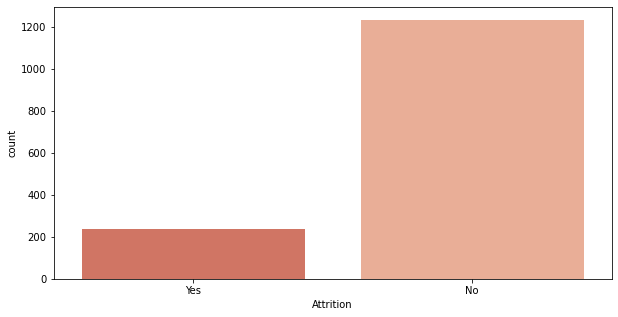

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(data['Attrition'])
plt.show()

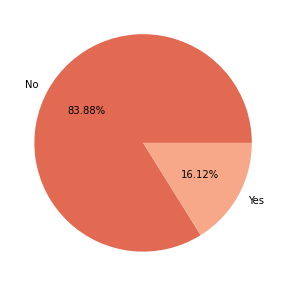

In [26]:
l='No', 'Yes'
plt.figure(figsize=(10,5))
plt.pie(data['Attrition'].value_counts(),autopct = '%2.2f%%', labels=l)
plt.show()

In [27]:
# Observations:

# The dataset is imblanced. We need to balance the dataset

# 2. BusinessTravel:

In [28]:
data["BusinessTravel"]. unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [29]:
data["BusinessTravel"]. value_counts()


Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

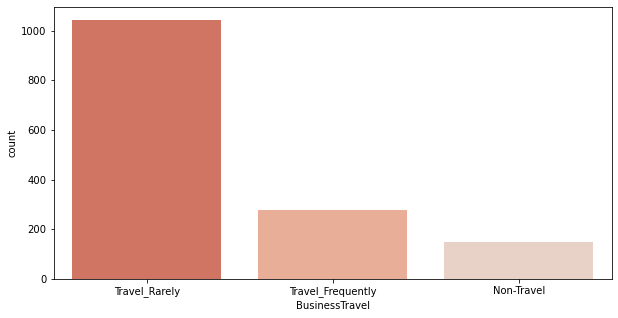

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(data['BusinessTravel'])
plt.show()

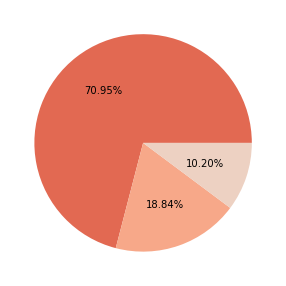

In [31]:
plt.figure(figsize=(10,5))
plt.pie(data['BusinessTravel'].value_counts(),autopct = '%2.2f%%')
plt.show()

In [32]:
# Observations:

# Travel_Rarely        1043
# Travel_Frequently     277
# Non-Travel            150

# 3. Department:

In [33]:
data["Department"]. unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [34]:
data["Department"]. value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

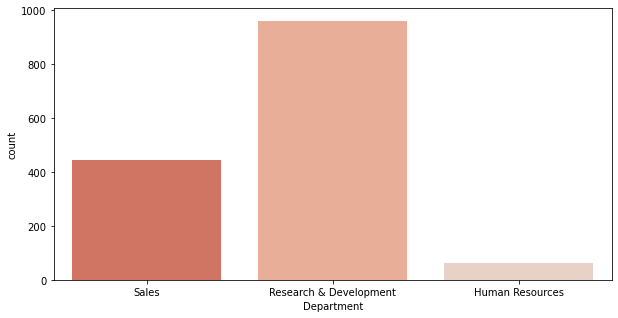

In [35]:
plt.figure(figsize=(10,5))
sns.countplot(data['Department'])
plt.show()

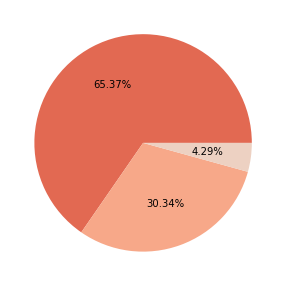

In [36]:
plt.figure(figsize=(10,5))
plt.pie(data['Department'].value_counts(),autopct = '%2.2f%%')
plt.show()

In [37]:
pd.crosstab([data.Education],[data.Department])

Department,Human Resources,Research & Development,Sales
Education,,,
1,5,115,50
2,13,182,87
3,27,379,166
4,15,255,128
5,3,30,15


In [38]:
# Observations:

# Most of the employee works in Research & Development department.

# Out of Total 961 Employee no of employee educated at 3,4,5 are 379,255 and 30 respectively.

# Only 63 Employee work in HR department.

In [39]:
pd.crosstab([data.Education],[data.Department,data.Attrition])

Department Human Resources     Research & Development     Sales    
Attrition               No Yes                     No Yes    No Yes
Education                                                          
1                        4   1                     96  19    39  11
2                       10   3                    159  23    69  18
3                       23   4                    323  56   127  39
4                       12   3                    223  32   105  23
5                        2   1                     27   3    14   1

In [40]:
# Observations:

# In Research & Development the employee with education level 5 and attrition 'no' is 3.

# 4. EducationField:

In [41]:
data["EducationField"]. unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [42]:
data["EducationField"]. value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

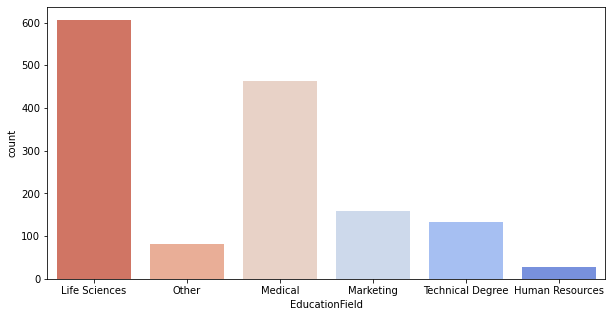

In [43]:
plt.figure(figsize=(10,5))
sns.countplot(data['EducationField'])
plt.show()

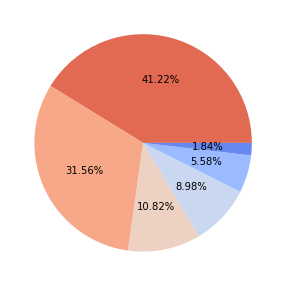

In [44]:
plt.figure(figsize=(10,5))
plt.pie(data['EducationField'].value_counts(),autopct = '%2.2f%%')
plt.show()

In [45]:
pd.crosstab([data.Education],[data.EducationField])

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
Education,,,,,,
1,2,67,14,63,5,19
2,2,116,24,99,19,22
3,16,233,59,183,24,57
4,5,173,52,104,33,31
5,2,17,10,15,1,3


In [46]:
pd.crosstab([data.Department],[data.EducationField])

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
Department,,,,,,
Human Resources,27,16,0,13,3,4
Research & Development,0,440,0,363,64,94
Sales,0,150,159,88,15,34


In [47]:
# Observations:

# Most of the employee worked in life science and medical EducationField.

# 41.22 % Employee comes from Life science background followed by Medical profession with 31.56%.

# Most of Employees with educational level 3.

# There are 159 Employee with Marketing background and all work in Sales Department.

# There are 13 Employee with Medical background and all work in HR Department.

# 5. Gender:

In [48]:
data["Gender"]. unique()

array(['Female', 'Male'], dtype=object)

In [49]:
data["Gender"]. value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

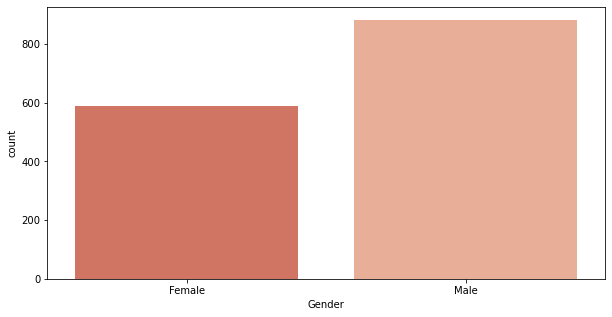

In [50]:
plt.figure(figsize=(10,5))
sns.countplot(data['Gender'])
plt.show()

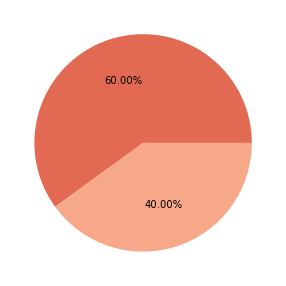

In [51]:
plt.figure(figsize=(10,5))
plt.pie(data['Gender'].value_counts(),autopct = '%2.2f%%')
plt.show()

In [52]:
# Observation:

# In the office the male female percentage is 60:40

# 6. JobRole:

In [53]:
data["JobRole"]. unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [54]:
data["JobRole"]. value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

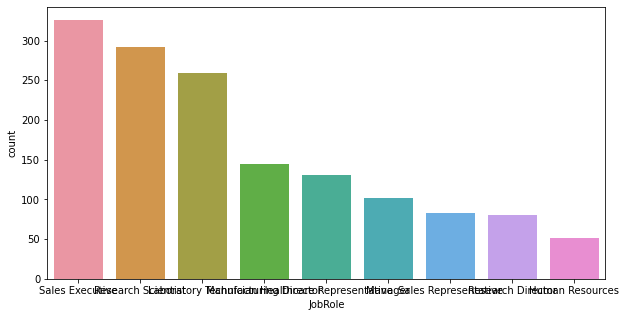

In [55]:
plt.figure(figsize=(10,5))
sns.countplot(data['JobRole'])
plt.show()

In [56]:
pd.crosstab([data.JobRole],[data.MaritalStatus])

MaritalStatus,Divorced,Married,Single
JobRole,,,
Healthcare Representative,34,61,36
Human Resources,14,28,10
Laboratory Technician,55,116,88
Manager,23,56,23
Manufacturing Director,36,67,42
Research Director,23,38,19
Research Scientist,62,122,108
Sales Executive,69,151,106
Sales Representative,11,34,38


In [57]:
pd.crosstab([data.JobRole],[data.Department])

Department,Human Resources,Research & Development,Sales
JobRole,,,
Healthcare Representative,0,131,0
Human Resources,52,0,0
Laboratory Technician,0,259,0
Manager,11,54,37
Manufacturing Director,0,145,0
Research Director,0,80,0
Research Scientist,0,292,0
Sales Executive,0,0,326
Sales Representative,0,0,83


In [58]:
# observations:

# Sales executive is the most common jobrole

# 52 people work in HR Department and only 27 people with HR background and from previous result.

# Around half employee working in HR department do not have HR background.

# HR department has 2 Job role and they are HR & Manager.

# 7. MaritalStatus

In [59]:
data["MaritalStatus"]. value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

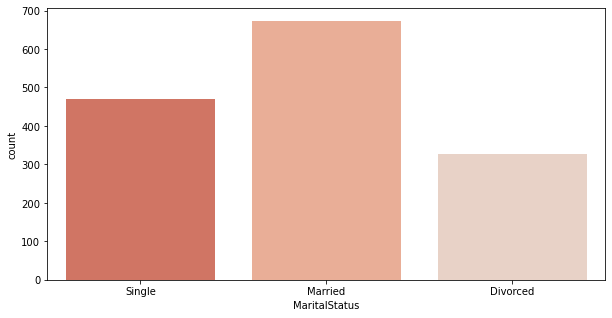

In [60]:
plt.figure(figsize=(10,5))
sns.countplot(data['MaritalStatus'])
plt.show()

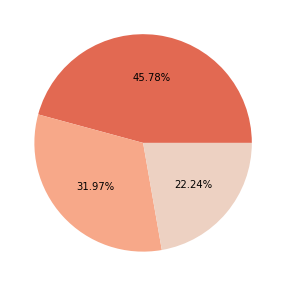

In [61]:
plt.figure(figsize=(10,5))
plt.pie(data['MaritalStatus'].value_counts(),autopct = '%2.2f%%')
plt.show()

In [62]:
pd.crosstab([data.Education],[data.MaritalStatus])

MaritalStatus,Divorced,Married,Single
Education,,,
1,32,82,56
2,72,130,80
3,125,253,194
4,90,182,126
5,8,26,14


In [63]:
# Observations:

# Most of the employee are married

# Most of the employee are in The education level  3

# 8. Over18:

In [64]:
data["Over18"]. value_counts()

Y    1470
Name: Over18, dtype: int64

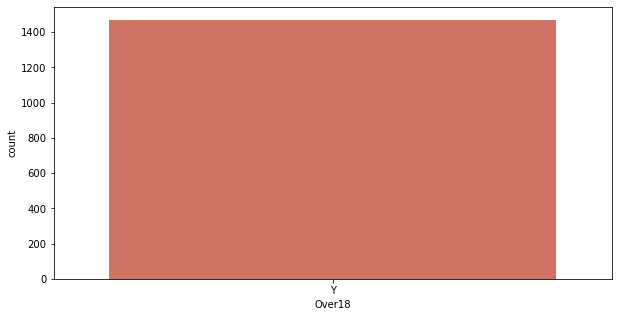

In [65]:
plt.figure(figsize=(10,5))
sns.countplot(data['Over18'])
plt.show()

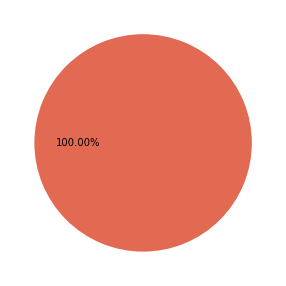

In [66]:
plt.figure(figsize=(10,5))
plt.pie(data['Over18'].value_counts(),autopct = '%2.2f%%')
plt.show()

In [67]:
# Observations:

# All the employee are over 18

# 9. OverTime

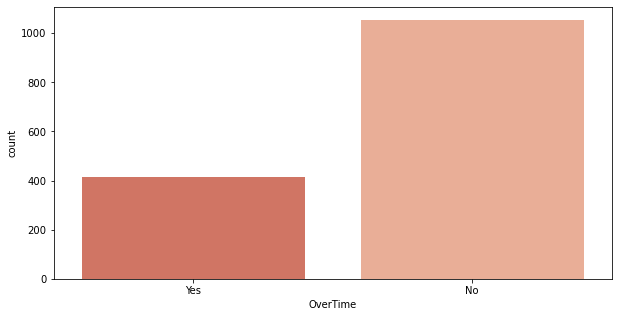

In [68]:
plt.figure(figsize=(10,5))
sns.countplot(data['OverTime'])
plt.show()

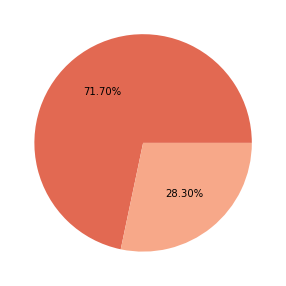

In [69]:
plt.figure(figsize=(10,5))
plt.pie(data['OverTime'].value_counts(),autopct = '%2.2f%%')
plt.show()

In [70]:
# Observations:

# Most of the employess are not doing over time.

# Exploration of different Ordinal features:

In [71]:
ordinal=['Education','EnvironmentSatisfaction', 'JobInvolvement','JobSatisfaction',
          'RelationshipSatisfaction', 'PerformanceRating', 'WorkLifeBalance' ]
for i in ordinal:
    print(i)
    print(data[i].value_counts())
    print("===========")

Education
3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64
EnvironmentSatisfaction
3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64
JobInvolvement
3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64
JobSatisfaction
4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64
RelationshipSatisfaction
3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64
PerformanceRating
3    1244
4     226
Name: PerformanceRating, dtype: int64
WorkLifeBalance
3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64


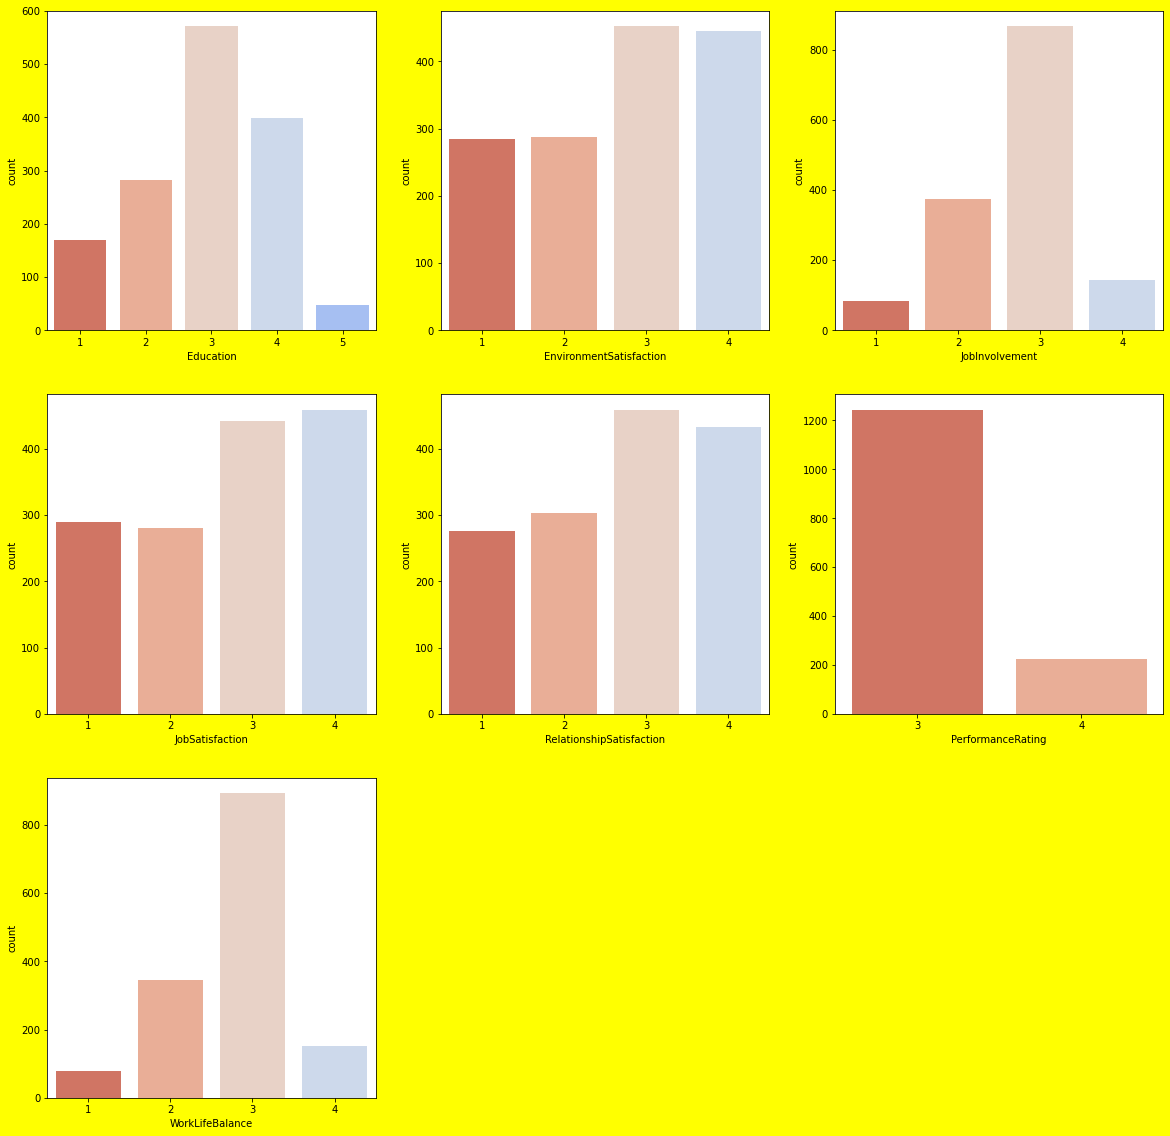

In [73]:
plt.figure(figsize=(20,20), facecolor='yellow')
pltno =1

for i in ordinal:
    if pltno <=9:
        plt.subplot(3,3,pltno)
        sns.countplot(data[i])
        plt.xlabel(i)
    pltno+=1
plt.show()

In [74]:
# Observations:

# 1) Most of the employee are in education level 3.

# 2) Most of the employee are in Jobinvolvement level 3.

# 3) Most of the employee are in JobSatisfaction level 4,
#seemd office is very helpful and cooperative with the employees

# 4) performance rating are in 3 or 4, most of the employee are getting 4.

# 5) WorkLifeBalance of most of the employee is 3

# EDA:
Target variable analysis:

In [75]:
pd.crosstab(data['JobRole'], data['Attrition'])

Attrition,No,Yes
JobRole,,
Healthcare Representative,122,9
Human Resources,40,12
Laboratory Technician,197,62
Manager,97,5
Manufacturing Director,135,10
Research Director,78,2
Research Scientist,245,47
Sales Executive,269,57
Sales Representative,50,33


In [76]:
pd.crosstab([data.JobRole,data.Department],[data.Attrition], margins=True)

Attrition                                           No  Yes   All
JobRole                   Department                             
Healthcare Representative Research & Development   122    9   131
Human Resources           Human Resources           40   12    52
Laboratory Technician     Research & Development   197   62   259
Manager                   Human Resources           11    0    11
                          Research & Development    51    3    54
                          Sales                     35    2    37
Manufacturing Director    Research & Development   135   10   145
Research Director         Research & Development    78    2    80
Research Scientist        Research & Development   245   47   292
Sales Executive           Sales                    269   57   326
Sales Representative      Sales                     50   33    83
All                                               1233  237  1470

<AxesSubplot:xlabel='Age', ylabel='count'>

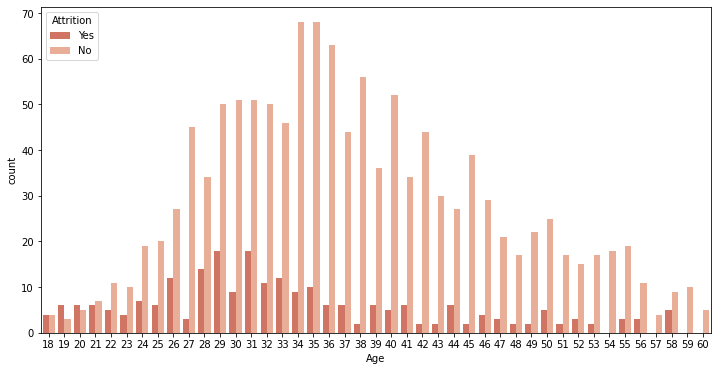

In [77]:
plt.subplots(figsize=(12,6))
sns.countplot(data['Age'], hue='Attrition', data= data)

In [78]:
# Observations:

# 1) Percentage of attrition is high in Laboratory Technician and Sales Executive,
#maybe for huge work pressure and less salary


# 2) 62 Laboratory Technician has resign from job, 7 sales executive and 47 Research Scientist are also resigned.

# 3) Percentage of attrition is very low in manager post, more invloved in work

# 4) The Attrition rate is min between the Age 48 to 53.

# 5) The Attrition rate is max between the Age 29 and 31.

# Features analysis:

In [79]:
# Grouping Numeric Features
numeric=[ 'Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate','MonthlyIncome', 'MonthlyRate', 
             'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears','TrainingTimesLastYear',
             'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

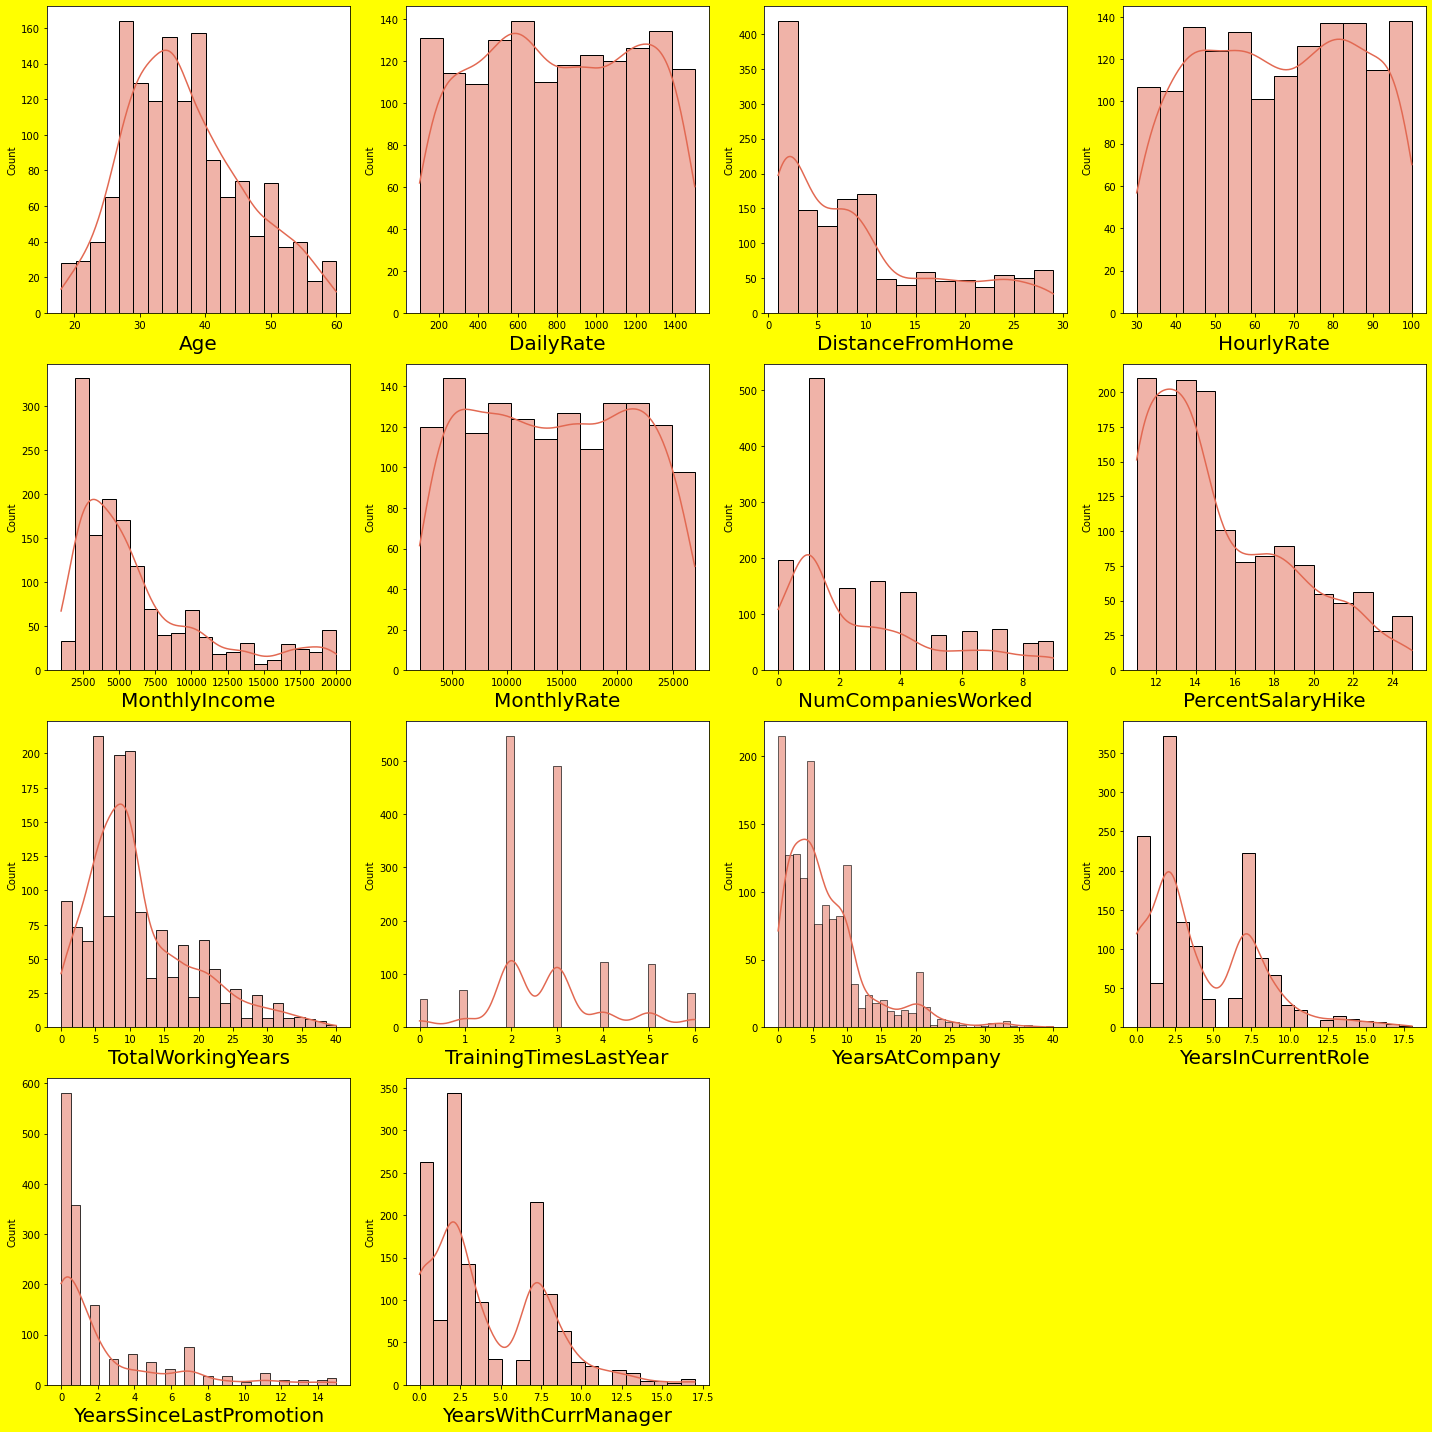

In [80]:
plt.figure(figsize=(20,20),facecolor='yellow' )
plno=1
for x in numeric:
    if plno<=14:
        plt.subplot(4,4, plno)
        sns.histplot(data[x], kde= True)
        plt.xlabel (x, fontsize= 20)
    plno +=1
plt.tight_layout()

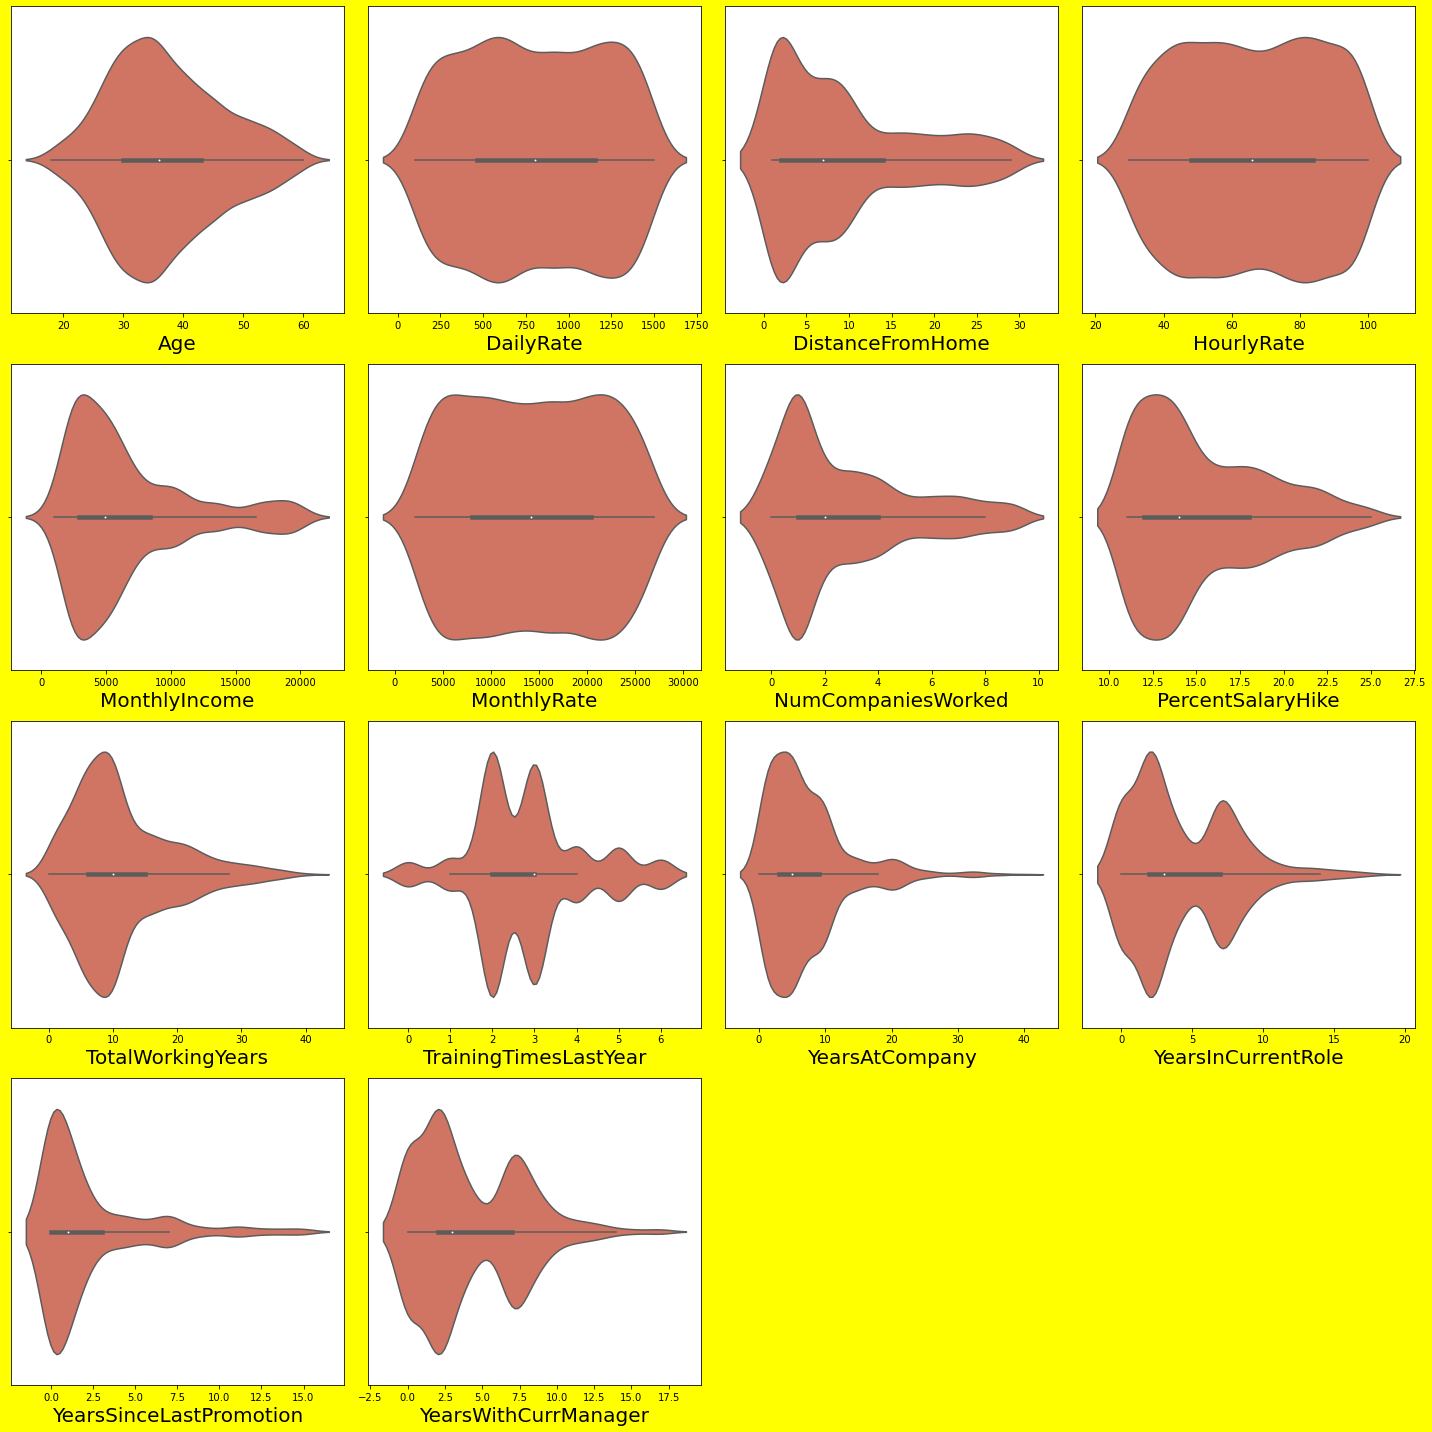

In [81]:
plt.figure(figsize=(20,20),facecolor='yellow' )
plno=1
for x in numeric:
    if plno<=14:
        plt.subplot(4,4, plno)
        sns.violinplot(data[x])
        plt.xlabel (x, fontsize= 20)
    plno +=1
plt.tight_layout()

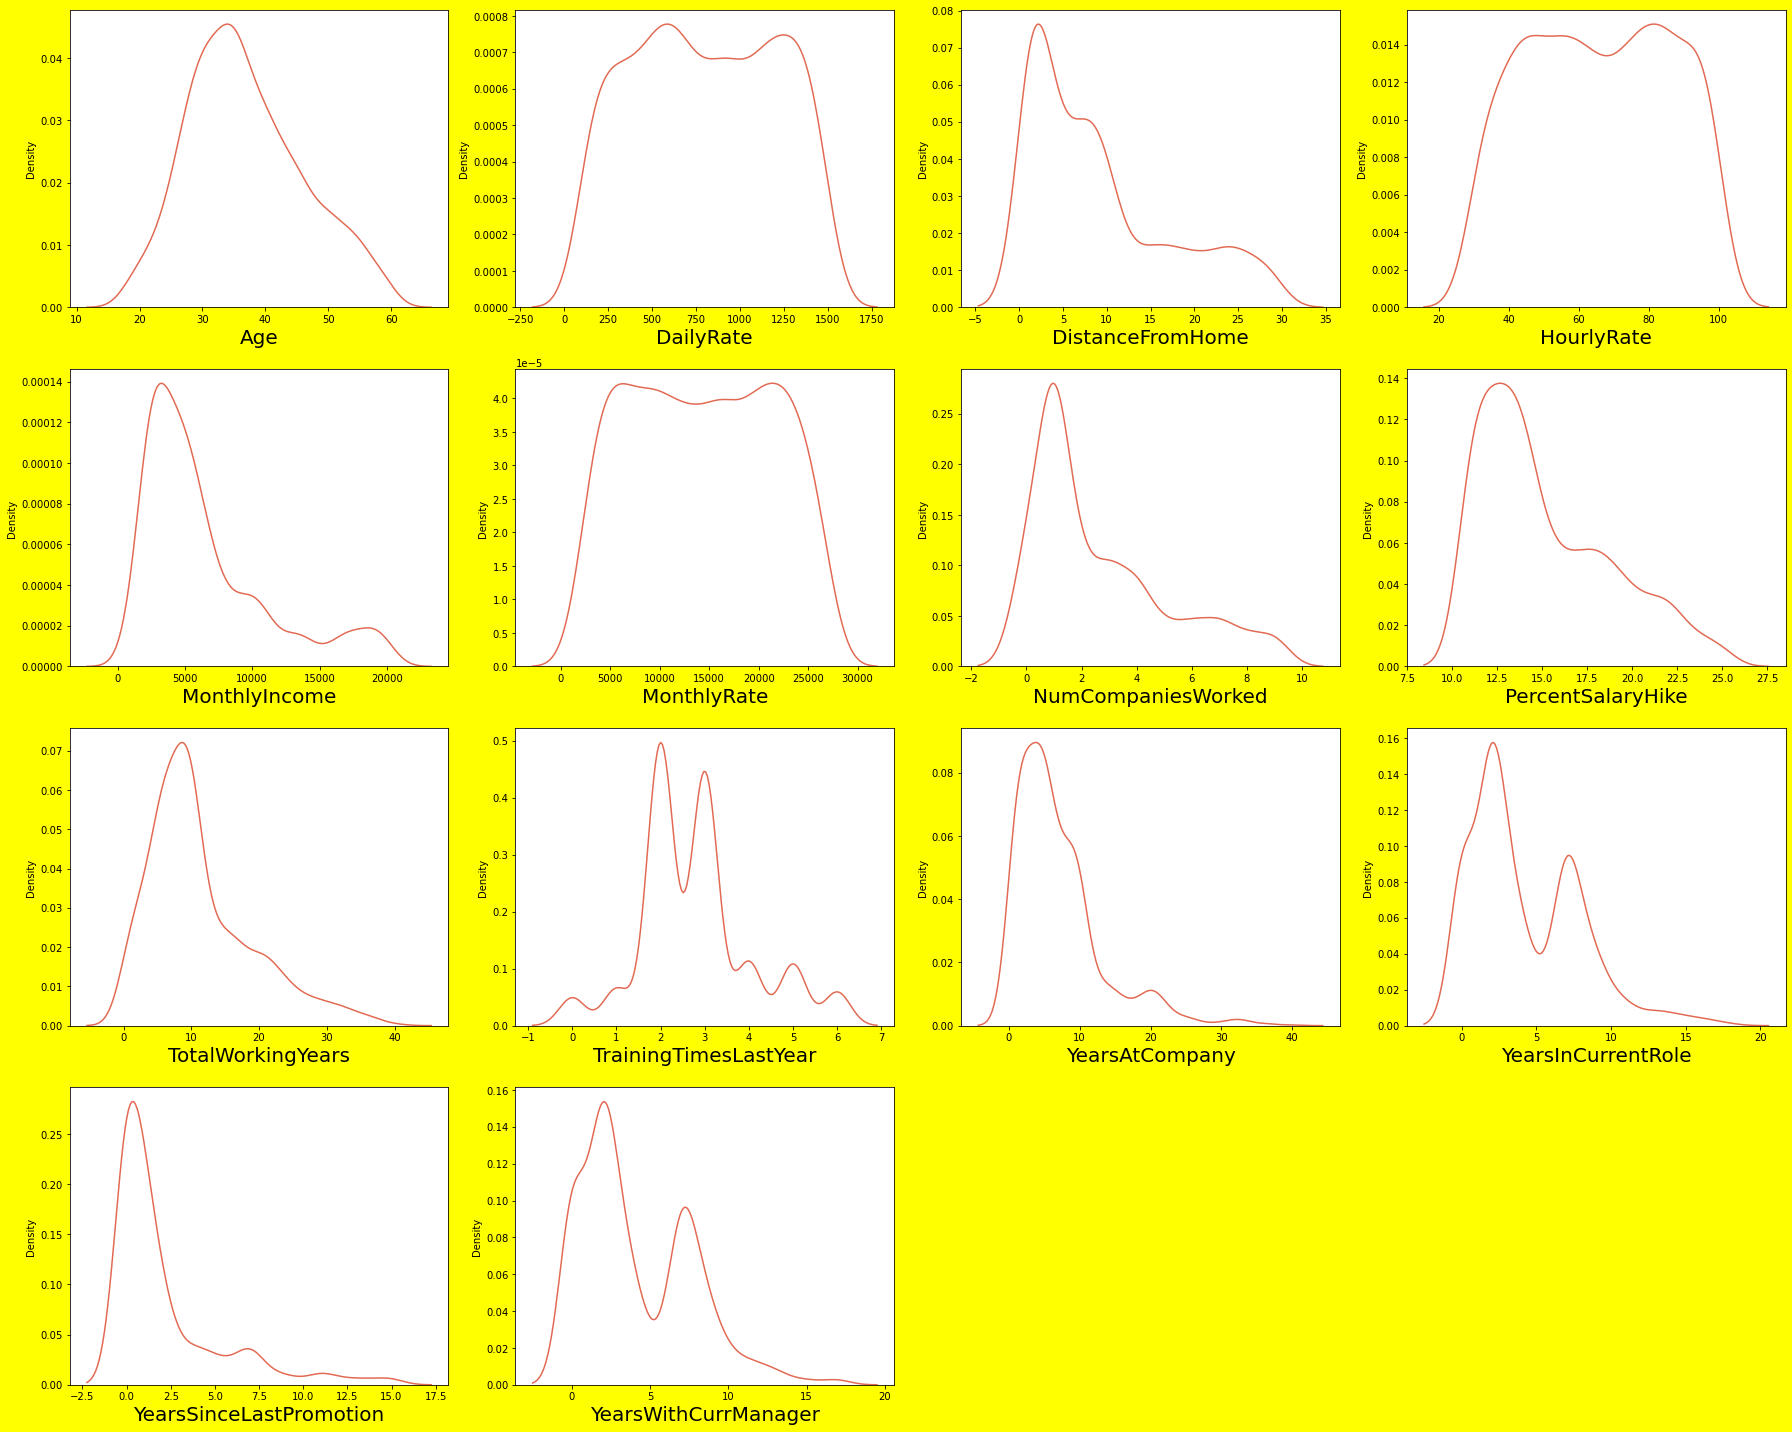

In [82]:
plt.figure(figsize=(25,20),facecolor='yellow' )
plno=1
for x in numeric:
    if plno<=14:
        plt.subplot(4,4,plno)
        sns.distplot(data[x], hist=False)
        plt.xlabel (x, fontsize= 20)
    plno +=1
plt.tight_layout()

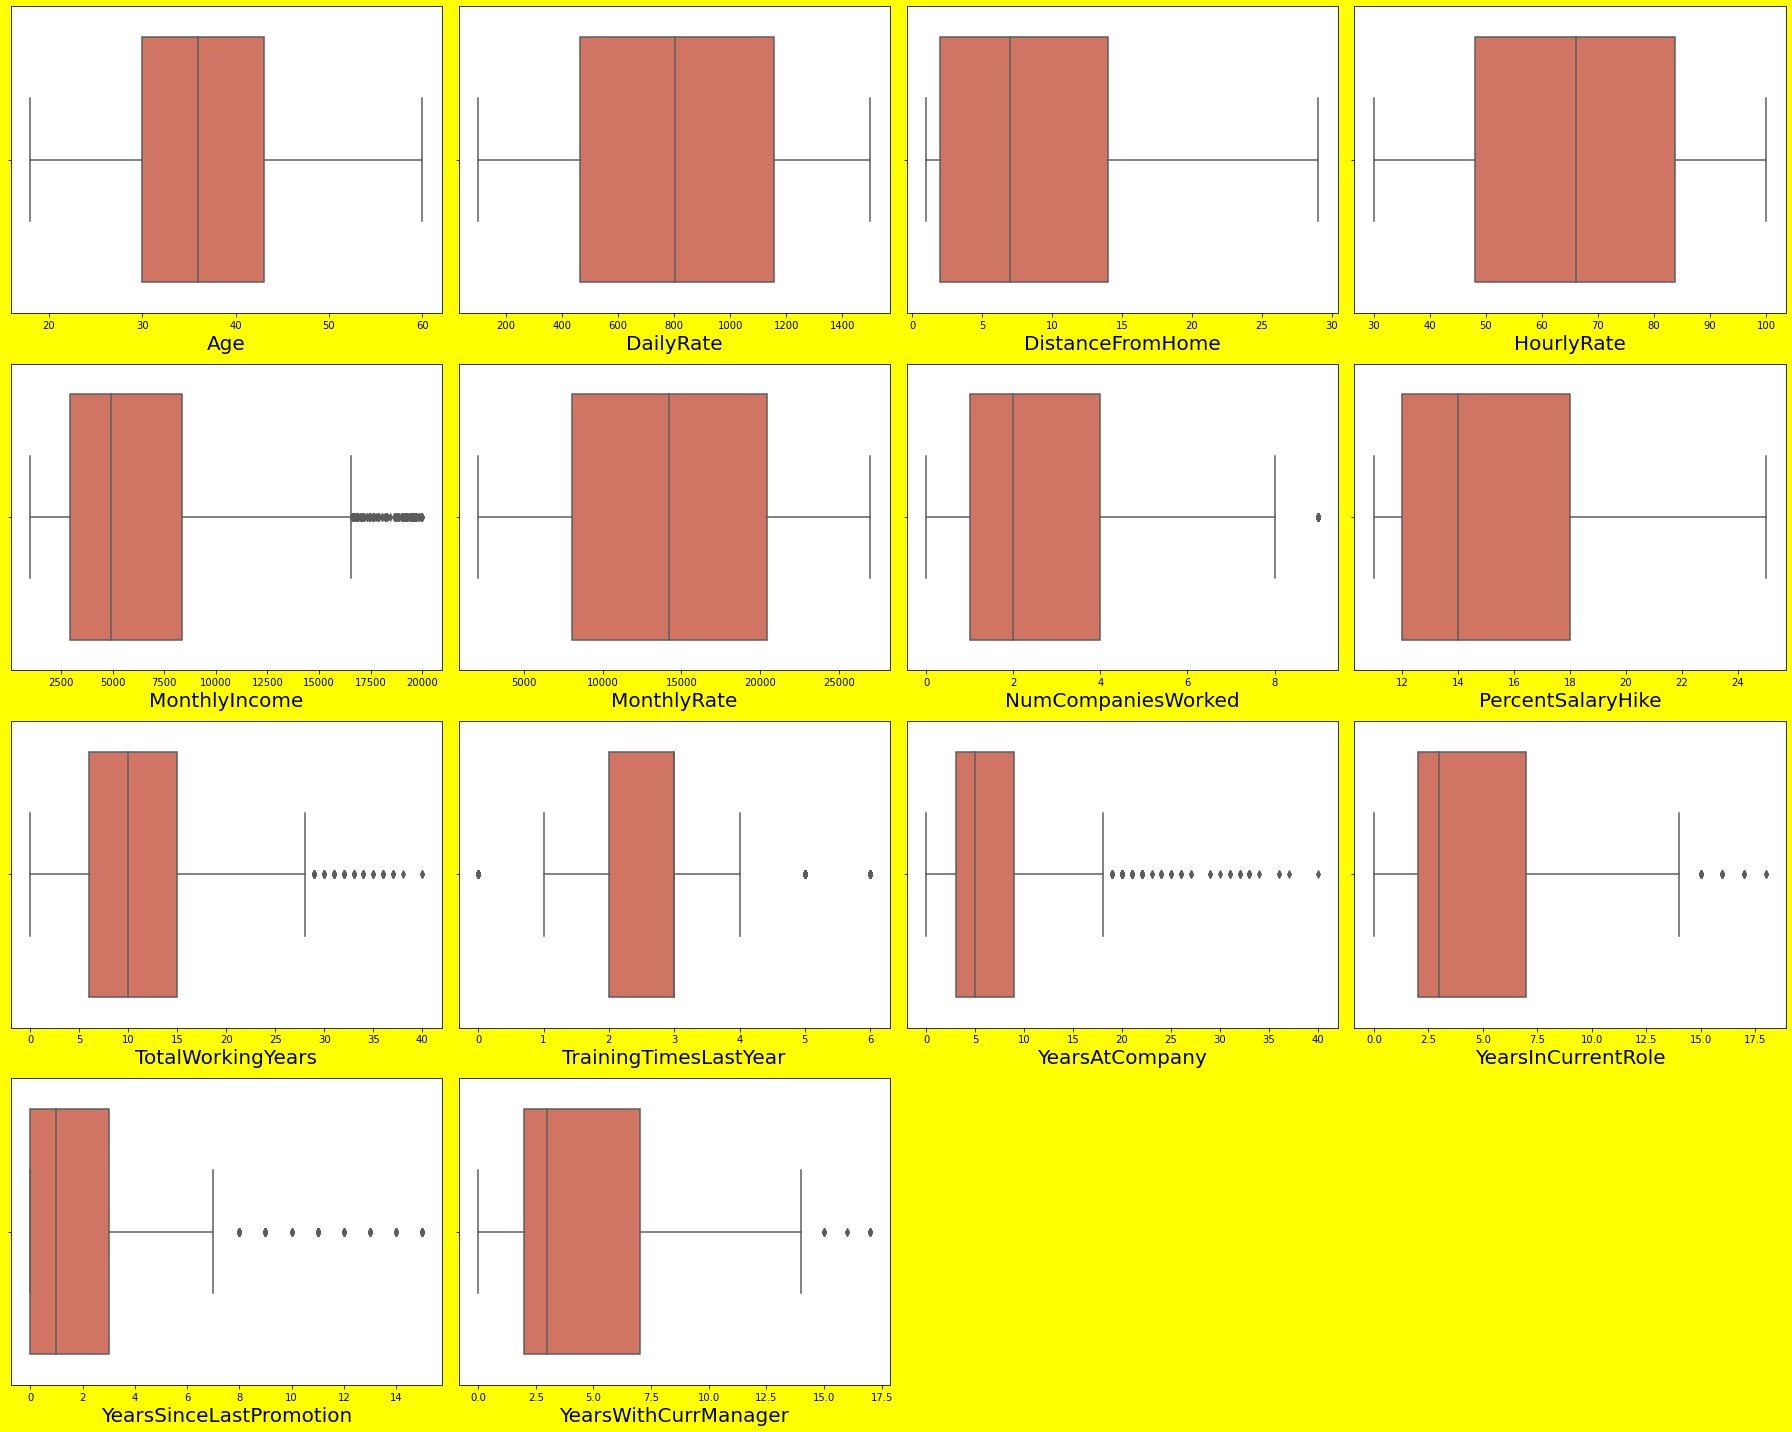

In [83]:
plt.figure(figsize=(25,20),facecolor='yellow' )
plno=1
for x in numeric:
    if plno<=14:
        plt.subplot(4,4,plno)
        sns.boxplot(data[x])
        plt.xlabel (x, fontsize= 20)
    plno +=1
plt.tight_layout()

In [84]:
# Observations:

# 1) Most of the employee age in between 30-40

# 2) Most of employee have spend 0- 10 years at company.

# 3) Most of the employee diatance from home in between 0-10

# 4) Most of employee staying company 0- 2.5 years after promotion.

# 5) Hourly rate in between 40-80

# 6) Most of employee are trained 2-3 times in last year.

# 7) Outliers are present in some columns

# 8) Most of employee stay in same role for maximum 4 yrs.

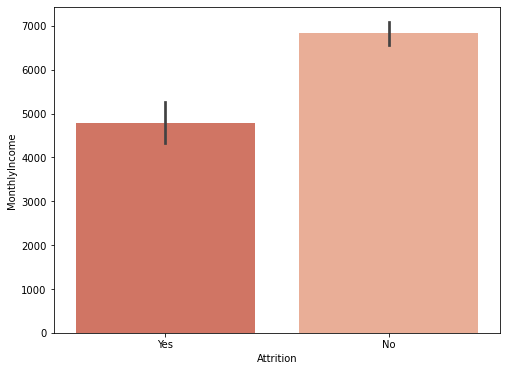

In [85]:
plt.figure(figsize=(8,6))
sns.barplot(x='Attrition',y='MonthlyIncome',data=data)
plt.show()


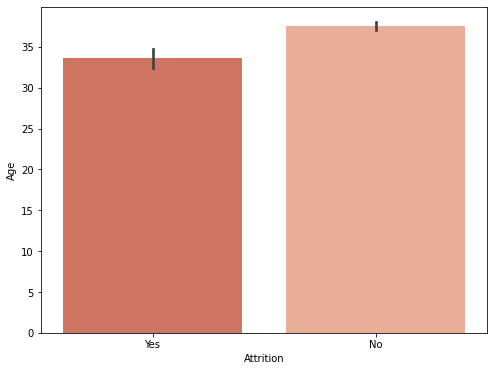

In [86]:
plt.figure(figsize=(8,6))
sns.barplot(x='Attrition',y='Age',data=data)
plt.show()

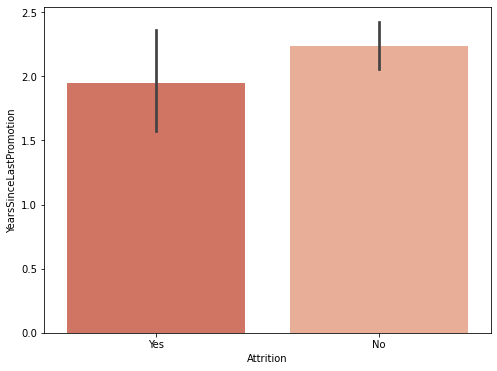

In [87]:
plt.figure(figsize=(8,6))
sns.barplot(x='Attrition',y='YearsSinceLastPromotion',data=data)
plt.show()

In [88]:
# Observations:

# The Attrition rate in the employees is high when the monthly income in between 5000

# The Attrition rate in the employees is high when the age in between 33

# The Attrition rate in the employees is high when the YearsSinceLastPromotion is less than 2 years.


# Drop unneccesary columns:

In [89]:
data.drop(["EmployeeCount", "EmployeeNumber", "Over18", "StandardHours"], axis=1, inplace=True)

In [90]:
data.shape

(1470, 31)

# Encoding categorical data:

In [91]:
# Using Label Encoder on target variable

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["Attrition"] = le.fit_transform(data["Attrition"])
data.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,No,17,3,3,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,No,15,3,1,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Yes,20,4,2,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,No,14,3,4,0,17,3,2,9,6,0,8
1469,34,0,Travel_Rarely,628,Research & Development,8,3,Medical,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,No,12,3,1,0,6,3,4,4,3,1,2


In [92]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [93]:
from sklearn.preprocessing import OrdinalEncoder
ordi = OrdinalEncoder()
def ordinal_encode(data, col):
    data[col] = ordi.fit_transform(data[col])
    return data

oe_col = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
data=ordinal_encode(data, oe_col)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2.0,1102,2.0,1,2,1.0,2,0.0,94,3,2,7.0,4,2.0,5993,19479,8,1.0,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1.0,279,1.0,8,1,1.0,3,1.0,61,2,2,6.0,2,1.0,5130,24907,1,0.0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2.0,1373,1.0,2,2,4.0,4,1.0,92,2,1,2.0,3,2.0,2090,2396,6,1.0,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1.0,1392,1.0,3,4,1.0,4,0.0,56,3,1,6.0,3,1.0,2909,23159,1,1.0,11,3,3,0,8,3,3,8,7,3,0
4,27,0,2.0,591,1.0,2,1,3.0,1,1.0,40,3,1,2.0,2,1.0,3468,16632,9,0.0,12,3,4,1,6,3,3,2,2,2,2


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   int64  
 2   BusinessTravel            1470 non-null   float64
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   float64
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   float64
 8   EnvironmentSatisfaction   1470 non-null   int64  
 9   Gender                    1470 non-null   float64
 10  HourlyRate                1470 non-null   int64  
 11  JobInvolvement            1470 non-null   int64  
 12  JobLevel                  1470 non-null   int64  
 13  JobRole                   1470 non-null   float64
 14  JobSatis

# Observation: All encoding done!!!

# Outliers Detection and Removal

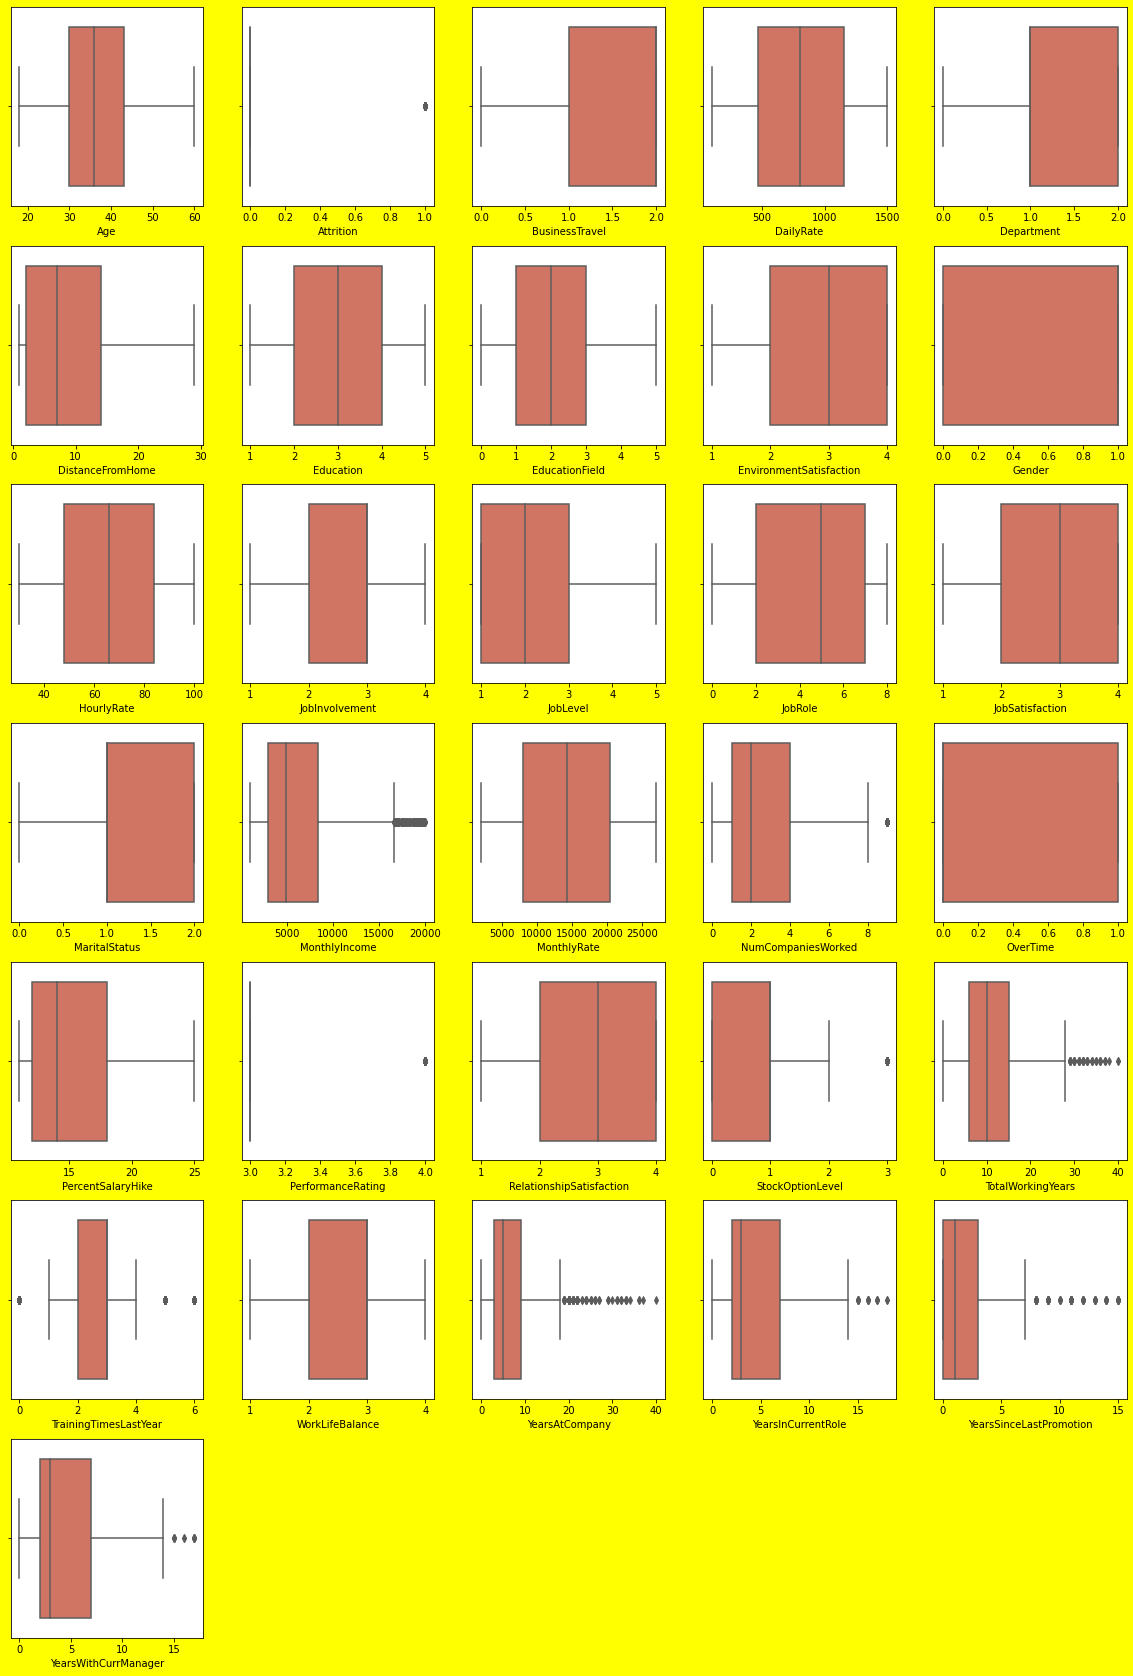

In [95]:
plt.figure(figsize=(20,30),facecolor='yellow')
plotnumber=1

for x in data:
    if plotnumber<=35:
        ax=plt.subplot(7,5,plotnumber)
        sns.boxplot(data[x])
        plt.xlabel(x)
    plotnumber+=1
plt.show()

Age                            AxesSubplot(0.125,0.787927;0.133621x0.0920732)
Attrition                   AxesSubplot(0.285345,0.787927;0.133621x0.0920732)
BusinessTravel               AxesSubplot(0.44569,0.787927;0.133621x0.0920732)
DailyRate                   AxesSubplot(0.606034,0.787927;0.133621x0.0920732)
Department                  AxesSubplot(0.766379,0.787927;0.133621x0.0920732)
DistanceFromHome               AxesSubplot(0.125,0.677439;0.133621x0.0920732)
Education                   AxesSubplot(0.285345,0.677439;0.133621x0.0920732)
EducationField               AxesSubplot(0.44569,0.677439;0.133621x0.0920732)
EnvironmentSatisfaction     AxesSubplot(0.606034,0.677439;0.133621x0.0920732)
Gender                      AxesSubplot(0.766379,0.677439;0.133621x0.0920732)
HourlyRate                     AxesSubplot(0.125,0.566951;0.133621x0.0920732)
JobInvolvement              AxesSubplot(0.285345,0.566951;0.133621x0.0920732)
JobLevel                     AxesSubplot(0.44569,0.566951;0.1336

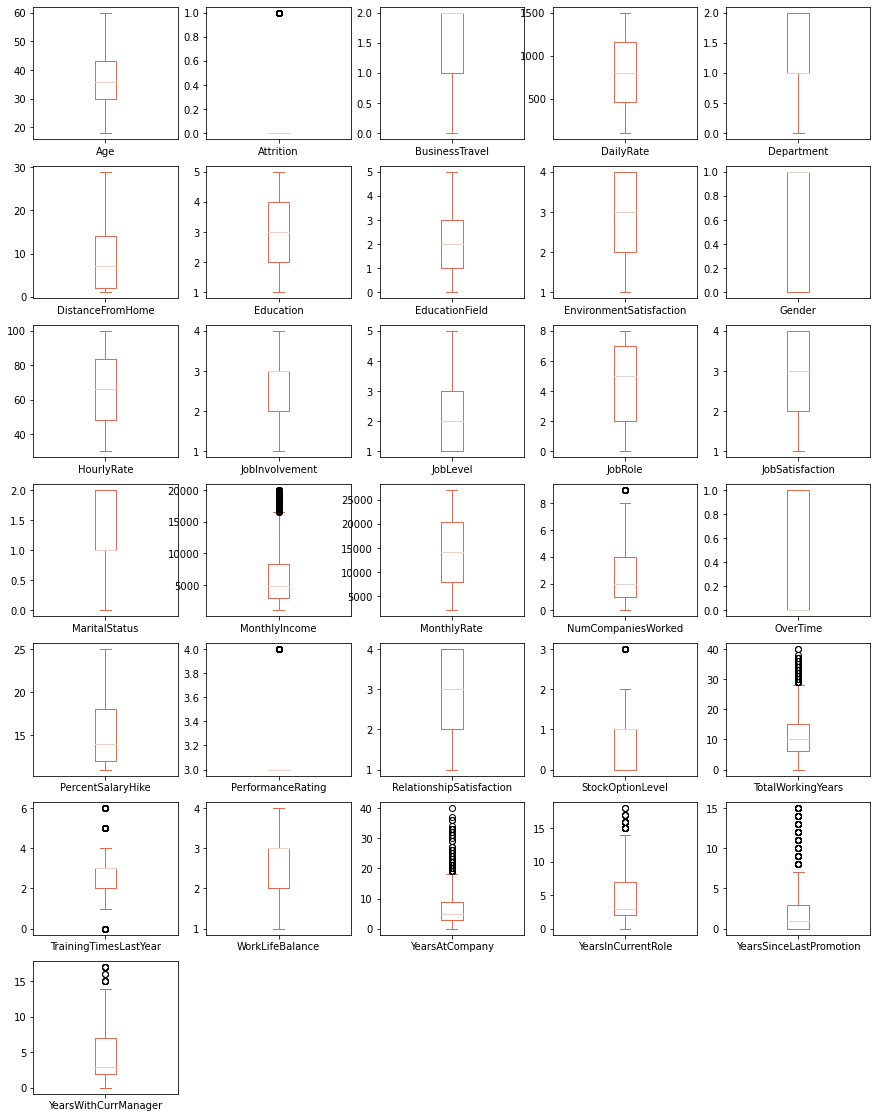

In [96]:
data.plot(kind ='box', subplots =True , layout =(7,5), figsize = (15,20))

In [98]:
# From the previous Boxplot , it is seen that there is outiers in featues columns. Let's remove it.

# Using Z score method:

In [99]:
from scipy.stats import zscore
z = np.abs(zscore(data))
print(np.where(z>3))

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
       1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
       1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430]), array([30, 29, 27, 29, 28, 29, 24, 24, 27, 29, 28, 29, 30, 24, 27, 29, 30,
       29, 24, 30, 27, 28, 29, 28, 30, 27, 29, 24, 27, 28, 29, 29, 30, 24,
       27, 27, 29, 29, 24, 28, 27, 27, 29, 27, 30, 29, 27, 24, 27, 29, 30,
       24, 30, 27, 29, 27, 30, 29, 28, 28,

In [100]:
data1 = data[(z<3).all(axis = 1)]
data1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2.0,1102,2.0,1,2,1.0,2,0.0,94,3,2,7.0,4,2.0,5993,19479,8,1.0,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1.0,279,1.0,8,1,1.0,3,1.0,61,2,2,6.0,2,1.0,5130,24907,1,0.0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2.0,1373,1.0,2,2,4.0,4,1.0,92,2,1,2.0,3,2.0,2090,2396,6,1.0,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1.0,1392,1.0,3,4,1.0,4,0.0,56,3,1,6.0,3,1.0,2909,23159,1,1.0,11,3,3,0,8,3,3,8,7,3,0
4,27,0,2.0,591,1.0,2,1,3.0,1,1.0,40,3,1,2.0,2,1.0,3468,16632,9,0.0,12,3,4,1,6,3,3,2,2,2,2


In [101]:
data1.shape

(1387, 31)

In [102]:
data.shape

(1470, 31)

In [104]:
# Data loss calculation with z-score method
loss_percent_zscore=round((data.shape[0]-data1.shape[0])/data.shape[0]*100,1)
loss_percent_zscore

5.6

# correlation:

In [105]:
data1.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159366,0.022340,0.021946,-0.038242,-0.011265,0.198502,-0.032676,0.014098,-0.039430,0.025465,0.036424,0.453902,-0.112957,0.011763,-0.104372,0.443747,0.026954,0.309209,0.034180,0.005891,-0.000617,0.041744,0.054506,0.636136,-0.019008,-0.016913,0.177620,0.121508,0.103632,0.121747
Attrition,-0.159366,1.000000,-0.001041,-0.057220,0.063637,0.081788,-0.032703,0.023585,-0.112393,0.036252,-0.001532,-0.133957,-0.171968,0.064283,-0.114206,0.160960,-0.161848,0.014888,0.050314,0.257237,-0.006267,0.010781,-0.052344,-0.136676,-0.185619,-0.057285,-0.062492,-0.166455,-0.171015,-0.029263,-0.162297
BusinessTravel,0.022340,-0.001041,1.000000,-0.004606,-0.003521,-0.032873,-0.010560,0.022576,0.001183,-0.025364,0.025424,0.028261,0.018996,0.000213,-0.032491,0.018687,0.033746,-0.010307,0.018764,0.022378,-0.023004,-0.018274,-0.029660,-0.015159,0.029818,0.010322,-0.014140,-0.027164,-0.029257,-0.027283,-0.044321
DailyRate,0.021946,-0.057220,-0.004606,1.000000,-0.005398,-0.008171,-0.018442,0.040645,0.033123,-0.005242,0.014279,0.048004,0.022978,-0.015437,0.042698,-0.074113,0.035004,-0.029844,0.032948,0.020294,0.027802,0.000574,0.004516,0.048361,0.046173,0.005861,-0.044266,-0.003580,0.022899,-0.043870,-0.011516
Department,-0.038242,0.063637,-0.003521,-0.005398,1.000000,0.023919,0.012846,0.013432,-0.014540,-0.030618,-0.002412,-0.024040,0.126809,0.678627,0.029521,0.052086,0.071876,0.022741,-0.044344,0.014908,-0.022678,-0.039364,-0.037705,-0.003424,-0.016246,0.036092,0.026978,0.032583,0.065536,0.048931,0.034216
DistanceFromHome,-0.011265,0.081788,-0.032873,-0.008171,0.023919,1.000000,0.001084,0.005882,-0.019279,-0.000819,0.028230,0.010106,0.008498,-0.000537,-0.009284,-0.021816,-0.015040,0.037052,-0.028307,0.026520,0.035864,0.023678,0.007885,0.049976,-0.001092,-0.034386,-0.034398,0.011579,0.019039,0.006635,-0.000221
Education,0.198502,-0.032703,-0.010560,-0.018442,0.012846,0.001084,1.000000,-0.038017,-0.026223,-0.019166,0.010848,0.041343,0.083065,0.015140,-0.007219,-0.012726,0.072670,-0.018540,0.130812,-0.017166,-0.011344,-0.023487,-0.002393,0.028494,0.125613,-0.026879,0.007844,0.033313,0.058007,0.042517,0.031210
EducationField,-0.032676,0.023585,0.022576,0.040645,0.013432,0.005882,-0.038017,1.000000,0.047924,0.010676,-0.006539,-0.006876,-0.035795,0.017492,-0.050934,0.012073,-0.030017,-0.023384,0.001983,0.007912,-0.007845,-0.003621,-0.013734,-0.015355,-0.012375,0.050502,0.034038,-0.012950,-0.010614,0.034094,0.013437
EnvironmentSatisfaction,0.014098,-0.112393,0.001183,0.033123,-0.014540,-0.019279,-0.026223,0.047924,1.000000,-0.015715,-0.040459,-0.012720,0.013835,-0.022354,-0.011186,-0.012453,0.003011,0.032916,0.015298,0.059355,-0.026797,-0.025299,0.018414,0.013330,-0.001669,-0.019318,0.032492,0.006621,0.038837,0.027943,0.001606
Gender,-0.039430,0.036252,-0.025364,-0.005242,-0.030618,-0.000819,-0.019166,0.010676,-0.015715,1.000000,0.004768,0.011939,-0.056970,-0.036831,0.036302,-0.056786,-0.047362,-0.045850,-0.030920,-0.051558,0.005443,-0.010757,0.041458,0.026438,-0.058555,-0.040211,0.000134,-0.045123,-0.025536,-0.028162,-0.036280


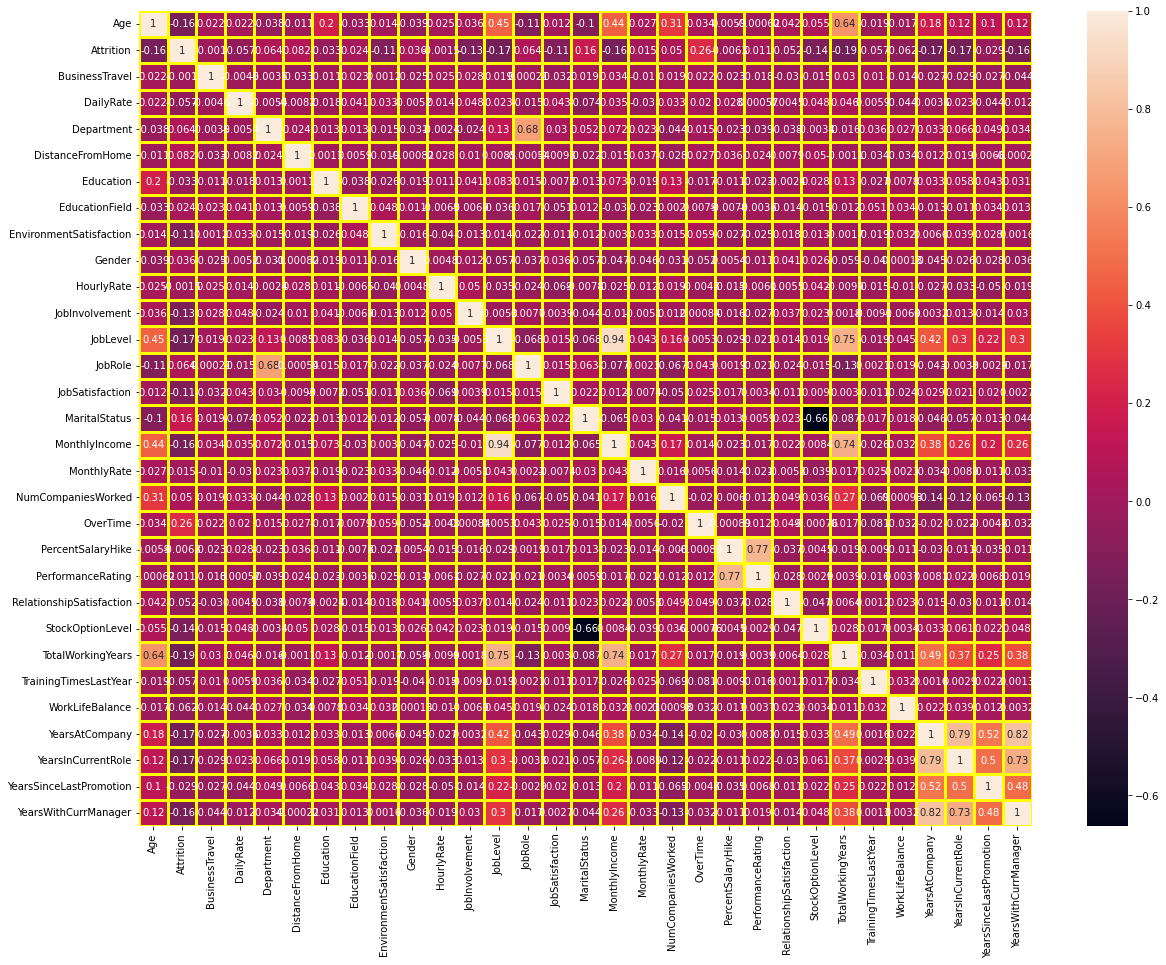

In [106]:
plt.subplots(figsize=(20,15))
sns.heatmap(data1.corr(), annot= True, linecolor= "yellow",  linewidths= 3)
plt.show()

In [107]:
data_new= data1.copy()

<AxesSubplot:title={'center':'feature vs Wins corr'}>

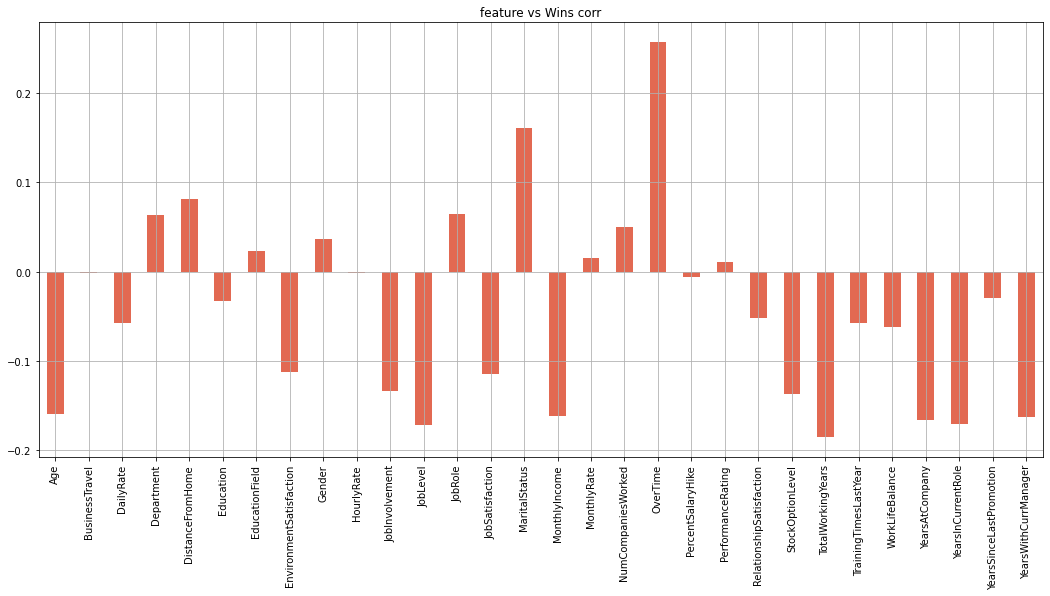

In [108]:
data1.drop("Attrition", axis=1).corrwith(data1["Attrition"]).plot(kind='bar',figsize=(18,8),grid='True',title='feature vs Wins corr')

In [109]:
# observations:

# Some of the feature having positive some are negetively correlated with target

# Skewness of features

In [110]:
data1.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
Y

In [111]:
# Splitting data 
x = data1.drop(['Attrition'], axis =1)
y = data1['Attrition']

# Transforming skew data using power transform:

In [112]:
from sklearn.preprocessing import power_transform
data1 = power_transform(x)
data1 = pd.DataFrame(data1, columns=x.columns)

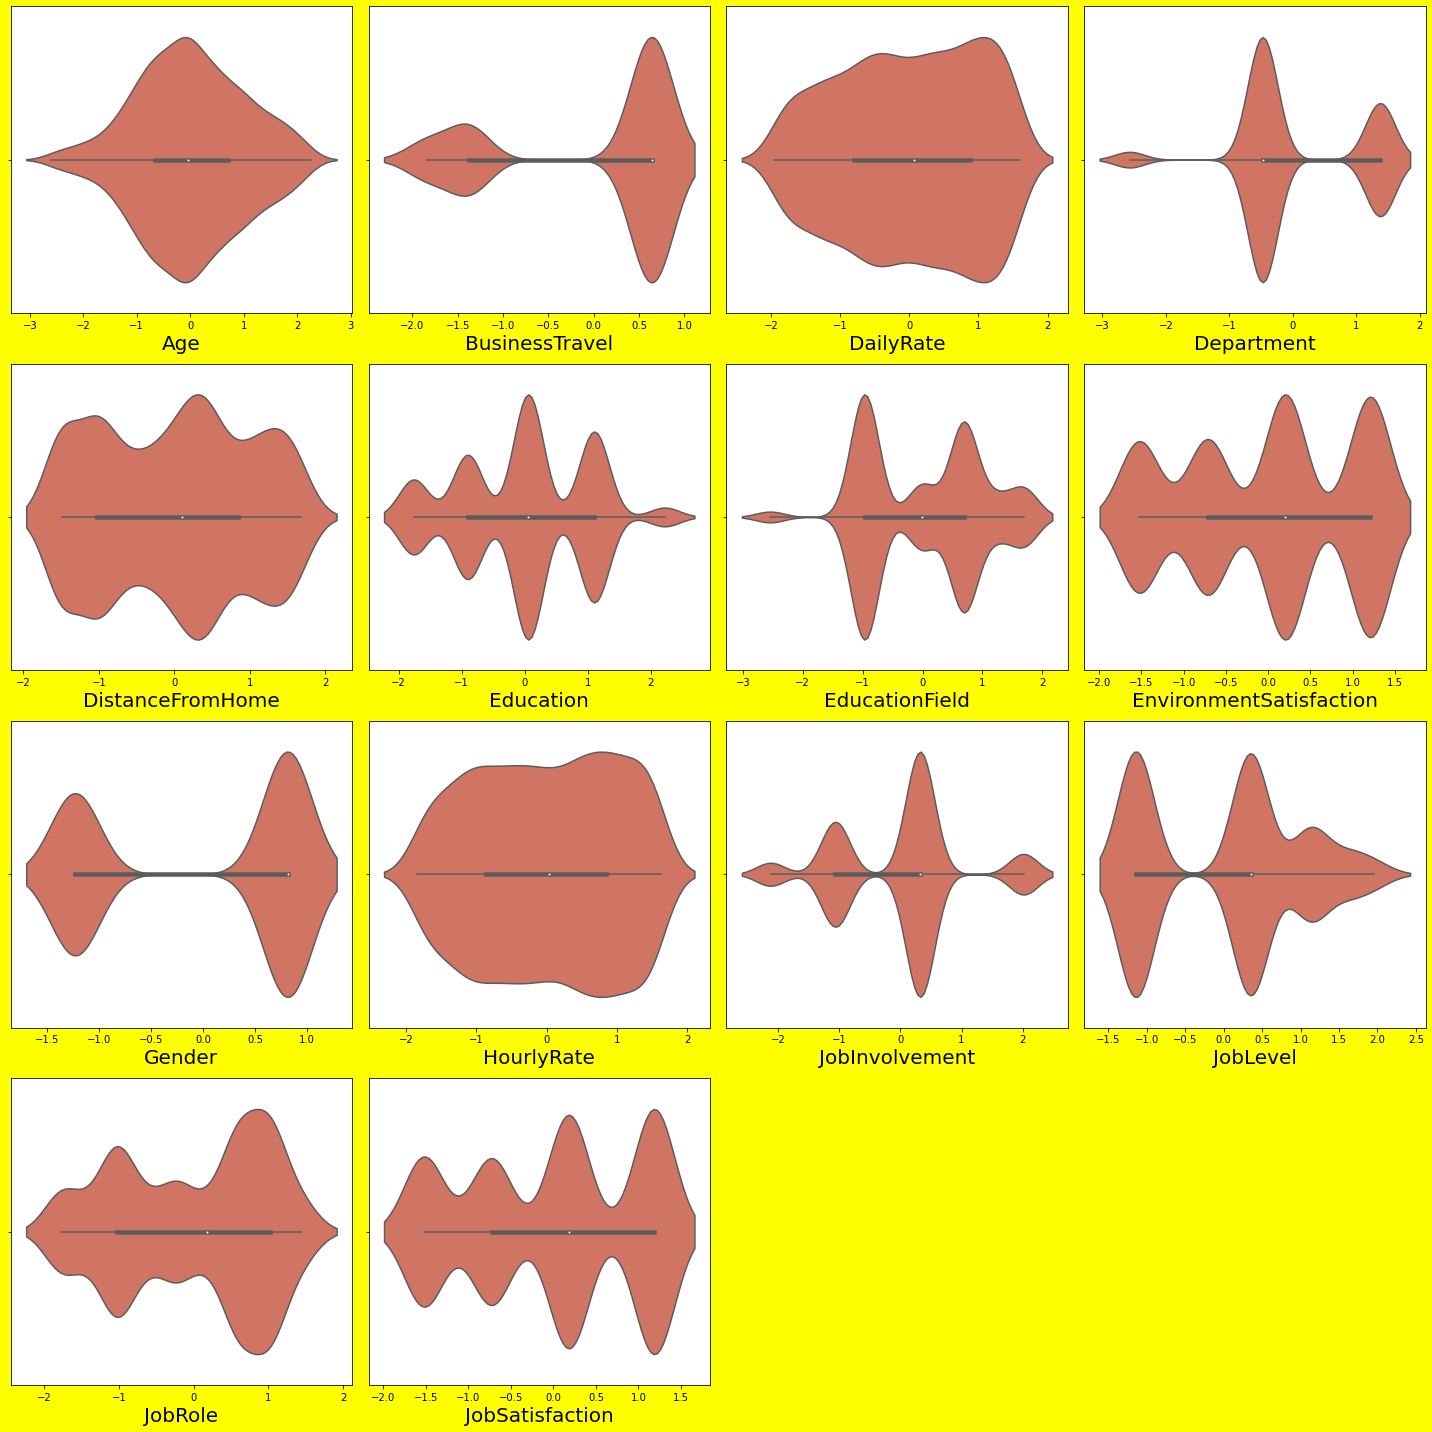

In [113]:
plt.figure(figsize=(20,20),facecolor='yellow' )
plno=1
for x in data1:
    if plno<=14:
        plt.subplot(4,4, plno)
        sns.violinplot(data1[x])
        plt.xlabel (x, fontsize= 20)
    plno +=1
plt.tight_layout()

# Checking Multicollinearity

In [114]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif= pd.DataFrame()
vif["VIF"]= [variance_inflation_factor(data1.values,i)for i in range(data1.shape[1])]
vif["Features"] = data1.columns
vif

,VIF,Features
0,1.930457,Age
1,1.014314,BusinessTravel
2,1.025841,DailyRate
3,2.172093,Department
4,1.017385,DistanceFromHome
5,1.065266,Education
6,1.030480,EducationField
7,1.024396,EnvironmentSatisfaction
8,1.024366,Gender
9,1.024189,HourlyRate


In [115]:
# observation:
#all features are in VIF limit 10

# Balancing

In [116]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [117]:
x= data1
y = data_new['Attrition']

In [118]:
# Oversampleing using SMOTE

x,y= smote.fit_resample(x,y)

In [119]:
y.value_counts()

1    1158
0    1158
Name: Attrition, dtype: int64

In [120]:
# dataset is now balanced

# Let's do Features selection

# Feature Selection Using PCA:
Data Standarization:

In [121]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


#data standarization
x_scale= scaler.fit_transform(x)

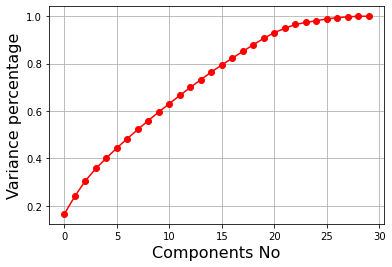

In [122]:
from sklearn.decomposition import PCA
pca = PCA()

#plot the graph to find the principal components

x_pca = pca.fit_transform(x_scale)
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Components No', fontsize= 16)
plt.ylabel('Variance percentage', fontsize= 16)
plt.grid()
plt.show()

In [123]:
#Observations:
#For components= 20, the variance percentage is >0.9 i.e. greater than 90%.

# Let's keep top 20 features for model evaluation

In [124]:
pca_new = PCA(n_components=20)
x_scale_new = pca_new.fit_transform(x_scale)
x_scale_final= pd.DataFrame(x_scale_new)

In [125]:
x_scale_final.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.918618,-0.902449,2.066584,-1.081682,-0.913532,1.403420,-0.002915,0.765221,0.060235,-1.148018,3.984347,-0.682324,1.227481,-2.153031,0.560664,-0.394283,-0.203624,-1.691590,-0.787583,-0.178181
1,1.907147,-0.306109,-0.653233,0.496583,1.228214,0.747112,0.831622,-0.154782,0.459590,0.411302,-1.782428,1.373985,-0.707658,0.204083,-2.202710,-2.198102,0.165194,-0.746358,0.283728,0.547802
2,-2.994554,1.137928,0.586371,-1.777107,-1.692971,-2.607011,-0.981891,-1.174351,0.118286,0.372568,1.728387,-0.520624,-0.395333,-0.166735,-1.021051,0.351150,1.801369,0.344459,-0.703321,0.252824
3,-0.110916,-0.898998,-0.823810,0.034107,-0.532079,1.164843,0.128211,1.277200,1.421596,1.096076,1.100758,-2.132002,0.951611,0.508992,-0.668931,0.654007,-1.127715,0.996405,0.573795,1.510661
4,-1.024110,1.247671,-0.766712,-0.185238,-0.039245,-1.615161,1.580470,0.849454,0.180047,-1.222544,-0.286531,0.542587,-1.171861,1.397505,0.255796,-0.228185,-1.246450,-2.136326,0.034879,0.408322


# check VIF after feature selection:

In [126]:
vif_final= pd.DataFrame()
vif_final['VIF']= [variance_inflation_factor(x_scale_final.values,i) for i in range(x_scale_final.shape[1])]
vif_final['Top 20 Features']= x_scale_final.columns
vif_final

,VIF,Top 20 Features
0,1.0,0
1,1.0,1
2,1.0,2
3,1.0,3
4,1.0,4
5,1.0,5
6,1.0,6
7,1.0,7
8,1.0,8
9,1.0,9


# Final predictions using different Regression ML Models:

# Find best Random state:

In [163]:
from sklearn.linear_model import LogisticRegression

acc_max=0
random_max=0
for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x_scale_final,y,test_size = 0.25, random_state=i)
    log= LogisticRegression()
    log.fit(x_train,y_train)
    y_pred=log.predict(x_test)
    acc= accuracy_score(y_test,y_pred)
    if acc>acc_max:
        acc_max=acc
        random_max=i
        
print('Best accuracy is', acc_max ,'on Random_state', random_max)

Best accuracy is 0.8411053540587219 on Random_state 552


In [128]:
print('Training feature shape:',x_train.shape)
print('Training target shape:',y_train.shape)
print('Test feature shape:',x_test.shape)
print('Test target shape:',y_test.shape)


Training feature shape: (1737, 20)
Training target shape: (1737,)
Test feature shape: (579, 20)
Test target shape: (579,)


# Using LogisticRegression():

In [164]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
x_train,x_test,y_train,y_test = train_test_split(x_scale_final,y,test_size = 0.25, random_state=552)

log = LogisticRegression()

log.fit(x_train, y_train)

y_pred = log.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print ('cof_mat:\n ', confusion_matrix(y_test, y_pred))
print('classification report:\n ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', log.score(x_train, y_train))
print('testing score : ', log.score(x_test, y_test))
print('AUC_ROC_score:', roc_auc_score(y_pred,y_test))

accu score :  0.8411053540587219
cof_mat:
  [[235  50]
 [ 42 252]]
classification report:
                precision    recall  f1-score   support

           0       0.85      0.82      0.84       285
           1       0.83      0.86      0.85       294

    accuracy                           0.84       579
   macro avg       0.84      0.84      0.84       579
weighted avg       0.84      0.84      0.84       579

-----------
-----------
training score :  0.7864133563615429
testing score :  0.8411053540587219
AUC_ROC_score: 0.8414062686781266


# Cross validation:

In [165]:
from sklearn.model_selection import cross_val_score
cvscore = cross_val_score(log,x_scale, y, cv =9)

print("CVScore :" ,cvscore)
print("Mean CV Score :",cvscore.mean())
print("Std deviation :",cvscore.std())

CVScore : [0.79457364 0.76744186 0.82170543 0.78210117 0.79377432 0.77821012
 0.77431907 0.81712062 0.80933852]
Mean CV Score : 0.7931760826069033
Std deviation : 0.018303828020541573


# Use GridSearchCV for hyperparameter tuning:

In [166]:
from sklearn.model_selection import GridSearchCV
grid = dict(solver=['newton-cg', 'lbfgs'],penalty=['l2','l1'], C=[10, 1.0, 0.1]
           , max_iter=[100, 140, 80])

grid_log = GridSearchCV(estimator=log, param_grid= grid, cv=5 )

grid_log.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [10, 1.0, 0.1], 'max_iter': [100, 140, 80],
                         'penalty': ['l2', 'l1'],
                         'solver': ['newton-cg', 'lbfgs']})

In [167]:
print('best params : ', grid_log.best_params_)
grid_log_best = grid_log.best_estimator_
grid_log_best.fit(x_train, y_train)

best params :  {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


LogisticRegression(C=10, solver='newton-cg')

In [168]:
y_pred = grid_log_best.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print ('cof_mat:\n ', confusion_matrix(y_test, y_pred))
print('classification report:\n ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', grid_log_best.score(x_train, y_train))
print('testing score : ', grid_log_best.score(x_test, y_test))
print('AUC_ROC_score:', roc_auc_score(y_pred,y_test))

accu score :  0.8411053540587219
cof_mat:
  [[235  50]
 [ 42 252]]
classification report:
                precision    recall  f1-score   support

           0       0.85      0.82      0.84       285
           1       0.83      0.86      0.85       294

    accuracy                           0.84       579
   macro avg       0.84      0.84      0.84       579
weighted avg       0.84      0.84      0.84       579

-----------
-----------
training score :  0.7846862406447899
testing score :  0.8411053540587219
AUC_ROC_score: 0.8414062686781266


In [169]:
# Observations:
# R2 score Not improved after using gridsearchCV

# Using DecisionTreeClassifier()

In [170]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', clf.score(x_train, y_train))
print('testing score : ', clf.score(x_test, y_test))
print('AUC_ROC_score:', roc_auc_score(y_pred,y_test))

accu score :  0.8341968911917098


cof_mat:  [[235  50]
 [ 46 248]]


classification report:                precision    recall  f1-score   support

           0       0.84      0.82      0.83       285
           1       0.83      0.84      0.84       294

    accuracy                           0.83       579
   macro avg       0.83      0.83      0.83       579
weighted avg       0.83      0.83      0.83       579

-----------
-----------
training score :  1.0
testing score :  0.8341968911917098
AUC_ROC_score: 0.8342568487425064


# Use GridSearchCV for hyperparameter tuning:

In [171]:
param = {'criterion' : ['gini', 'entropy', 'log_loss'],
    'min_samples_split' : range(1,4), 'splitter': ["best", "random"], 'ccp_alpha': [0.1, .01, .001, 10, 0.0001,1, 0.5],
        'max_features': ['auto', 'sqrt', 'log2']}

grid_search = GridSearchCV(estimator = clf, cv=5, param_grid = param)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001, 10, 0.0001, 1, 0.5],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': range(1, 4),
                         'splitter': ['best', 'random']})

In [172]:
print('best params : ', grid_search.best_params_)

grid_clf_best = grid_search.best_estimator_
grid_clf_best.fit(x_train, y_train)

best params :  {'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_features': 'log2', 'min_samples_split': 2, 'splitter': 'best'}


DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy',
                       max_features='log2')

In [173]:
y_pred = grid_clf_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_clf_best.score(x_train, y_train))
print('testing score : ', grid_clf_best.score(x_test, y_test))
print('AUC_ROC_score:', roc_auc_score(y_pred,y_test))

accu score :  0.7979274611398963


cof_mat:  [[214  71]
 [ 46 248]]


classification report:                precision    recall  f1-score   support

           0       0.82      0.75      0.79       285
           1       0.78      0.84      0.81       294

    accuracy                           0.80       579
   macro avg       0.80      0.80      0.80       579
weighted avg       0.80      0.80      0.80       579

-----------
-----------
training score :  0.998272884283247
testing score :  0.7979274611398963
AUC_ROC_score: 0.8002531950807813


In [174]:
# Observation
# Scores are infact coming lower

# Using KNeighborsClassifier()

In [175]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
rmse_val = []
for i in range(0,18):
    i = i+1
    knn = neighbors.KNeighborsClassifier(n_neighbors = i)

    knn.fit(x_train,y_train) 
    y_pred=knn.predict(x_test) 
    error =np. sqrt(mean_squared_error(y_test,y_pred)) 
    rmse_val.append(error) 
    print('RMSE value for k= ' , i , 'is:', error)

RMSE value for k=  1 is: 0.34521150684176005
RMSE value for k=  2 is: 0.3165007291803216
RMSE value for k=  3 is: 0.38539843232784426
RMSE value for k=  4 is: 0.3550766780893539
RMSE value for k=  5 is: 0.40506294954184235
RMSE value for k=  6 is: 0.3876326448552972
RMSE value for k=  7 is: 0.4437242293472879
RMSE value for k=  8 is: 0.41765857753918484
RMSE value for k=  9 is: 0.4533506041615139
RMSE value for k=  10 is: 0.4437242293472879
RMSE value for k=  11 is: 0.45902953874872665
RMSE value for k=  12 is: 0.4338843315056208
RMSE value for k=  13 is: 0.46277678083215756
RMSE value for k=  14 is: 0.46277678083215756
RMSE value for k=  15 is: 0.47384073608955674
RMSE value for k=  16 is: 0.4571443992078605
RMSE value for k=  17 is: 0.47747175268428077
RMSE value for k=  18 is: 0.4646390691645805


In [176]:
min(rmse_val)

0.3165007291803216

# #### For k=2 we get the best RMSE value for KNeighborsClassifier()

In [177]:
knn =KNeighborsClassifier(n_neighbors= 2)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))
print("-----------")
print("-----------")


print('training score : ', grid_clf_best.score(x_train, y_train))
print('testing score : ', grid_clf_best.score(x_test, y_test))
print('AUC_ROC_score:', roc_auc_score(y_pred,y_test))

accu score :  0.8998272884283247


cof_mat:  [[231  54]
 [  4 290]]


classification report:                precision    recall  f1-score   support

           0       0.98      0.81      0.89       285
           1       0.84      0.99      0.91       294

    accuracy                           0.90       579
   macro avg       0.91      0.90      0.90       579
weighted avg       0.91      0.90      0.90       579

-----------
-----------
training score :  0.998272884283247
testing score :  0.7979274611398963
AUC_ROC_score: 0.9130009896091045


# Using GridSearchCV

In [178]:
param = {'algorithm' : ['auto','kd_tree'],
             'leaf_size' : [30,40,10,],
             'n_neighbors' : [10]}
    

gridsearchknn = GridSearchCV(estimator = knn, param_grid=param, cv=5)

gridsearchknn.fit(x_train, y_train) 

print("Best Parameters:" , gridsearchknn.best_params_)

Best Parameters: {'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 10}


In [179]:
grid_knn_best = gridsearchknn.best_estimator_

grid_knn_best.fit(x_train, y_train)

y_pred = grid_knn_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))
print("-----------")
print("-----------")


print('training score : ', grid_clf_best.score(x_train, y_train))
print('testing score : ', grid_clf_best.score(x_test, y_test))
print('AUC_ROC_score:', roc_auc_score(y_pred,y_test))

accu score :  0.8031088082901554


cof_mat:  [[188  97]
 [ 17 277]]


classification report:                precision    recall  f1-score   support

           0       0.92      0.66      0.77       285
           1       0.74      0.94      0.83       294

    accuracy                           0.80       579
   macro avg       0.83      0.80      0.80       579
weighted avg       0.83      0.80      0.80       579

-----------
-----------
training score :  0.998272884283247
testing score :  0.7979274611398963
AUC_ROC_score: 0.828857440980827


In [180]:
# Observation:
# score is not improved after gridsearch



# Using GradientBoostingClassifier()


In [181]:
from sklearn.ensemble import GradientBoostingClassifier

gbdt= GradientBoostingClassifier()
gbdt.fit(x_train, y_train)

y_pred = gbdt.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', gbdt.score(x_train, y_train))
print('testing score : ', gbdt.score(x_test, y_test))
print('AUC_ROC_score:', roc_auc_score(y_pred,y_test))

accu score :  0.8860103626943006


cof_mat:  [[251  34]
 [ 32 262]]


classification report:                precision    recall  f1-score   support

           0       0.89      0.88      0.88       285
           1       0.89      0.89      0.89       294

    accuracy                           0.89       579
   macro avg       0.89      0.89      0.89       579
weighted avg       0.89      0.89      0.89       579

-----------
-----------
training score :  0.953943580886586
testing score :  0.8860103626943006
AUC_ROC_score: 0.8860304650940694


# Gridsearch CV

In [182]:
param= {"min_samples_split" : [2,1], "max_depth":[3,5,7], "learning_rate": [0.1,0.01,10], 
        "min_samples_leaf" :[1,2]}

grid_gbdt= GridSearchCV (gbdt, param_grid= param,cv=5)

grid_gbdt.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.01, 10],
                         'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 1]})

In [183]:
print('best params : ', grid_gbdt.best_params_)

grid_gbdt_best = grid_gbdt.best_estimator_
grid_gbdt_best.fit(x_train, y_train)

best params :  {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}


GradientBoostingClassifier(max_depth=7)

In [188]:
y_pred = grid_gbdt_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_gbdt_best.score(x_train, y_train))
print('testing score : ', grid_gbdt_best.score(x_test, y_test))
print('AUC_ROC_score:', roc_auc_score(y_pred,y_test))

accu score :  0.9378238341968912


cof_mat:  [[265  20]
 [ 16 278]]


classification report:                precision    recall  f1-score   support

           0       0.94      0.93      0.94       285
           1       0.93      0.95      0.94       294

    accuracy                           0.94       579
   macro avg       0.94      0.94      0.94       579
weighted avg       0.94      0.94      0.94       579

-----------
-----------
Mean absolute error: 0.06217616580310881
Mean square error: 0.06217616580310881
Root mean square error: 0.2493514904770148
R2 Score: 0.7512352309344791
-----------
-----------
training score :  1.0
testing score :  0.9378238341968912
AUC_ROC_score: 0.9379732021304543


In [187]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [189]:
#Observations:
# scores slightly improved after hyper parameter tunning

# Using RandomForestClassifier()

In [190]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', rf.score(x_train, y_train))
print('testing score : ', rf.score(x_test, y_test))
print('AUC_ROC_score:', roc_auc_score(y_pred,y_test))

accu score :  0.9499136442141624


cof_mat:  [[271  14]
 [ 15 279]]


classification report:                precision    recall  f1-score   support

           0       0.95      0.95      0.95       285
           1       0.95      0.95      0.95       294

    accuracy                           0.95       579
   macro avg       0.95      0.95      0.95       579
weighted avg       0.95      0.95      0.95       579

-----------
-----------
training score :  1.0
testing score :  0.9499136442141624
AUC_ROC_score: 0.9498854387932885


# Use GridSearchCV for hyperparameter tuning:

In [191]:
params = {'n_estimators' : [100,80],
          'criterion' : ["gini", "entropy"]}

rf_grd = GridSearchCV(rf, param_grid = params, cv=5)

rf_grd.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [100, 80]})

In [192]:
print('best params : ', rf_grd.best_params_)

grid_rf_best = rf_grd.best_estimator_
grid_rf_best.fit(x_train, y_train)

best params :  {'criterion': 'entropy', 'n_estimators': 80}


RandomForestClassifier(criterion='entropy', n_estimators=80)

In [193]:
y_pred = grid_rf_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_rf_best.score(x_train, y_train))
print('testing score : ', grid_rf_best.score(x_test, y_test))
print('AUC_ROC_score:', roc_auc_score(y_pred,y_test))

accu score :  0.9395509499136442


cof_mat:  [[271  14]
 [ 21 273]]


classification report: 
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       285
           1       0.95      0.93      0.94       294

    accuracy                           0.94       579
   macro avg       0.94      0.94      0.94       579
weighted avg       0.94      0.94      0.94       579

-----------
-----------
training score :  1.0
testing score :  0.9395509499136442
AUC_ROC_score: 0.9396508519879719


# Observations:
Accuracy score, training score, testing score, AUC ROC score etc are not improved after using GridSearchCV with RandomForestClassifier()

In [194]:
from sklearn.model_selection import cross_val_score

all_models = [log, clf, knn, grid_gbdt_best, rf]

for i in all_models:
    cvscore = cross_val_score(i, x_scale,y, cv = 5)
    print('Cross Validation Score of :',i)
    print("\n Cross Validation Score : " ,cvscore)
    print("\nMean CV Score :",cvscore.mean())
    print("\nStd deviation :",cvscore.std())
    print("\n-----------")
    print("-----------")

Cross Validation Score of : LogisticRegression()

 Cross Validation Score :  [0.78663793 0.80345572 0.79265659 0.78617711 0.81209503]

Mean CV Score : 0.7962044760557085

Std deviation : 0.010096977979662846

-----------
-----------
Cross Validation Score of : DecisionTreeClassifier()

 Cross Validation Score :  [0.71551724 0.88768898 0.8812095  0.88336933 0.87041037]

Mean CV Score : 0.8476390854248901

Std deviation : 0.0663058530672552

-----------
-----------
Cross Validation Score of : KNeighborsClassifier(n_neighbors=2)

 Cross Validation Score :  [0.89224138 0.90064795 0.92224622 0.88336933 0.87904968]

Mean CV Score : 0.8955109108512698

Std deviation : 0.015298666522456992

-----------
-----------
Cross Validation Score of : GradientBoostingClassifier(max_depth=7)

 Cross Validation Score :  [0.67241379 0.97408207 0.96328294 0.95680346 0.9762419 ]

Mean CV Score : 0.9085648320548149

Std deviation : 0.11828866690542683

-----------
-----------
Cross Validation Score of : Rando

In [195]:
# Among all models the best model is randomForestClassifier()

# Plotting ROC AUC Curve to chose best model

In [196]:
log.fit(x_train, y_train)
clf.fit(x_train, y_train)
knn.fit(x_train, y_train)
grid_gbdt_best.fit(x_train, y_train)
rf.fit(x_train, y_train)
print ("All model are trained")

All model are trained


In [197]:
log.fit(x_test, y_test)
clf.fit(x_test, y_test)
knn.fit(x_test, y_test)
grid_gbdt_best.fit(x_test, y_test)
rf.fit(x_test, y_test)
print ("All model are test")

All model are test


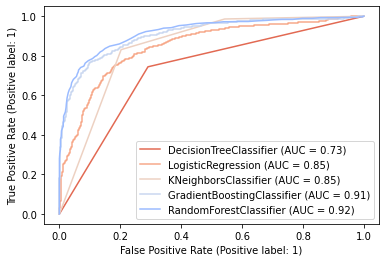

In [198]:
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(clf, x_train, y_train)

plot_roc_curve(log, x_train, y_train, ax=disp.ax_)
plot_roc_curve(knn, x_train, y_train, ax=disp.ax_)
plot_roc_curve(grid_gbdt_best, x_train, y_train, ax=disp.ax_)

plot_roc_curve(rf, x_train, y_train, ax=disp.ax_)

plt.legend(prop = {'size':10}, loc='lower right')
plt.show()

# According to the above plot, the best AUC of training is RandomForest

# Let's check it by AUC plot of testing.

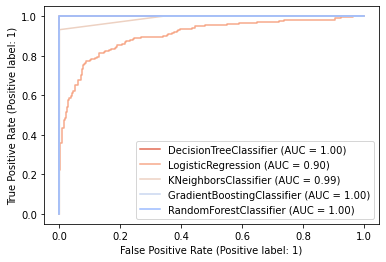

In [199]:
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(clf, x_test, y_test)

plot_roc_curve(log,x_test, y_test, ax=disp.ax_)
plot_roc_curve(knn, x_test, y_test, ax=disp.ax_)
plot_roc_curve(grid_gbdt_best, x_test, y_test, ax=disp.ax_)

plot_roc_curve(rf, x_test, y_test, ax=disp.ax_)

plt.legend(prop = {'size':10}, loc='lower right')
plt.show()

# To choose best model , let's check the minimum variation of training and testing AUC score.
So here the best model is randomforest()


# Final Model:

In [200]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', rf.score(x_train, y_train))
print('testing score : ', rf.score(x_test, y_test))
print('AUC_ROC_score:', roc_auc_score(y_pred,y_test))

accu score :  0.9447322970639033


cof_mat:  [[271  14]
 [ 18 276]]


classification report:                precision    recall  f1-score   support

           0       0.94      0.95      0.94       285
           1       0.95      0.94      0.95       294

    accuracy                           0.94       579
   macro avg       0.94      0.94      0.94       579
weighted avg       0.94      0.94      0.94       579

-----------
-----------
training score :  1.0
testing score :  0.9447322970639033
AUC_ROC_score: 0.9447202004534067


In [201]:
y_pred =rf.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,

# Confusion matrix of final model:

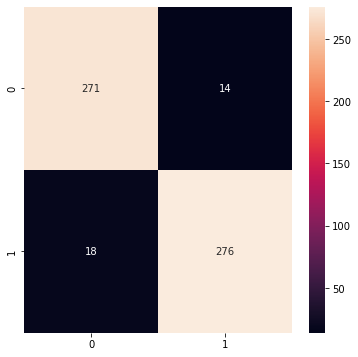

In [202]:
conf = confusion_matrix (y_test, y_pred)

fig , ax = plt.subplots(figsize=(6,6))
sns.heatmap(conf, annot = True, fmt = ".0f")
plt.show()

# Load and save the model

In [203]:
import pickle
pickle.dump(log, open("HR_Classification_model", "wb"))
load_HR_Classification_model= pickle.load(open("HR_Classification_model", "rb"))

In [204]:
y_pred = load_HR_Classification_model.predict(x_test)

y_test = np.array(y_test)
data_prediction_by_model = pd.DataFrame()
data_prediction_by_model["Predicted Values"] = y_pred
data_prediction_by_model["Actual Values"] = y_test
data_prediction_by_model.sample(n=6)

,Predicted Values,Actual Values
249,1,1
389,0,0
533,0,0
59,0,0
518,0,0
433,1,1


In [205]:
feature= x.columns
feature

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

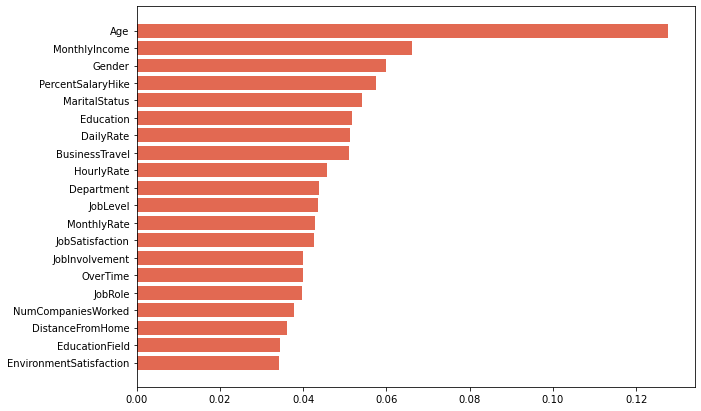

In [206]:
fimp = list(zip(feature,rf.feature_importances_))
fimp.sort(key = lambda x : x[1])
plt.figure(figsize=(10,7))
plt.barh([x[0] for x in fimp],[x[1] for x in fimp])

plt.show()


# age is the most important feature for model prediction